In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
from utility import *

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [4]:
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in set(lst1) if value in temp] 
    return lst3 

In [5]:
from scipy import stats
def box_cox_normalise(ser, offset = 3, bw='scott'):
    
    
    # box cox lr_scale
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    x = ser.values +ser.values.min()+offset
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')
    ax2 = fig.add_subplot(312)
    xt, _ = stats.boxcox(x)
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Box-Cox transformation')
    ax3 = fig.add_subplot(313)
    xt_std = (xt-xt.mean())/xt.std()
    sns.kdeplot(xt_std, ax=ax3, bw=bw, cut=0);
    sns.kdeplot(np.random.normal(size=len(xt_std)), ax=ax3, cut=0);
    plt.suptitle(ser.name)
    return xt_std
    
    

In [6]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [6]:
## (1) PERSONALITY DATASET

personality_dataset = "personality-isf2018"

personality_data = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"personality-data.csv")
ratings = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"ratings.csv")

# remove random spaces in column names!
personality_data.columns = [x.strip() for x in personality_data.columns]

# remove random spaces and deal with typo in userid
ratings.columns = ['userid', 'movie_id', 'rating', 'tstamp']

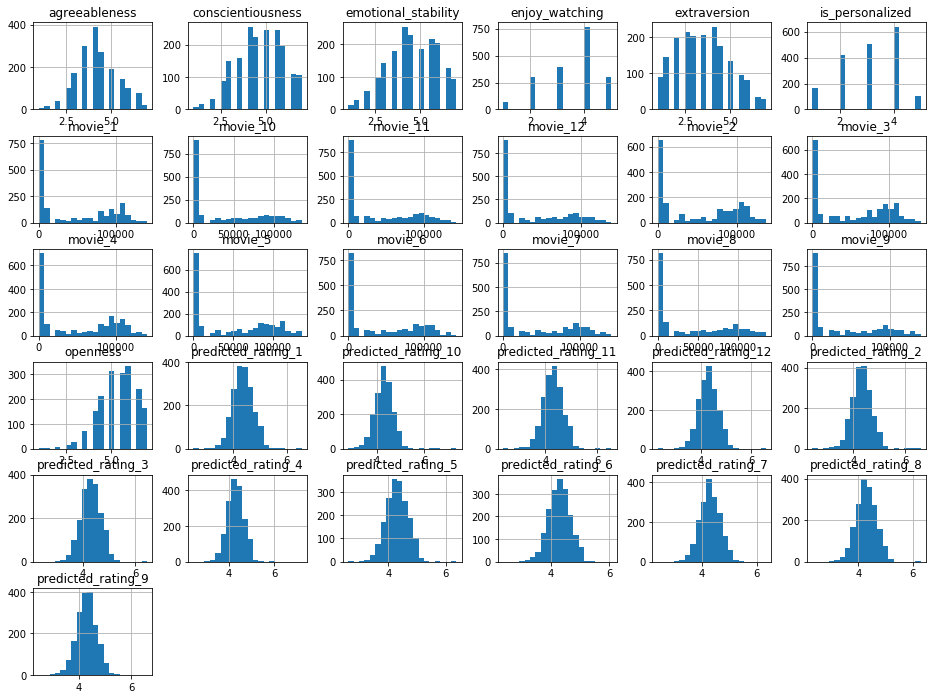

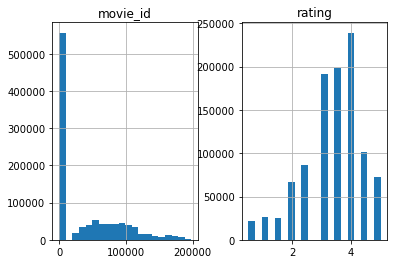

In [4]:
personality_data.hist(figsize=(16,12),bins=20);
ratings.hist(bins=20);

In [419]:
movied_id_mean_ratings = ratings[["movie_id","rating"]].groupby("movie_id").mean()

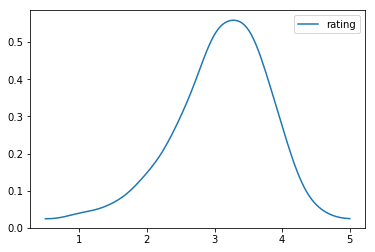

In [430]:
sns.kdeplot( movied_id_mean_ratings["rating"] , bw=.25, cut=0)

In [456]:
# movied_id_mean_ratings["rating"].value_counts().sort_index()

In [438]:
high_rated_movies = movied_id_mean_ratings["rating"][movied_id_mean_ratings["rating"]==5].index

In [452]:
low_rated_movies = movied_id_mean_ratings["rating"][movied_id_mean_ratings["rating"]==0.5].index

In [ ]:
# low rated movies seem to agree with ML ratings
# high rated movies not at all ???

In [410]:
ratings["movie_id"].max()

198117

In [5]:
personality_data_plus_mean_and_std_rat = personality_data.merge(ratings[["userid","rating"]].groupby("userid").mean(), left_on="userid", right_on="userid").merge(ratings[["userid","rating"]].groupby("userid").std(), left_on="userid", right_on="userid").copy()
personality_data_plus_mean_and_std_rat.columns = ['userid', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'assigned metric',
       'assigned condition', 'movie_1', 'predicted_rating_1', 'movie_2',
       'predicted_rating_2', 'movie_3', 'predicted_rating_3', 'movie_4',
       'predicted_rating_4', 'movie_5', 'predicted_rating_5', 'movie_6',
       'predicted_rating_6', 'movie_7', 'predicted_rating_7', 'movie_8',
       'predicted_rating_8', 'movie_9', 'predicted_rating_9', 'movie_10',
       'predicted_rating_10', 'movie_11', 'predicted_rating_11', 'movie_12',
       'predicted_rating_12', 'is_personalized', 'enjoy_watching',  'rating_mean', 'rating_std']

In [6]:


personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']].corr()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,rating_mean,rating_std
openness,1.000000,0.055357,0.075027,0.010792,0.260681,0.072959,0.073349
agreeableness,0.055357,1.000000,0.177512,0.076279,0.106503,0.121999,-0.101327
emotional_stability,0.075027,0.177512,1.000000,0.280099,0.036384,0.042709,-0.038236
conscientiousness,0.010792,0.076279,0.280099,1.000000,0.004265,0.012426,0.001874
extraversion,0.260681,0.106503,0.036384,0.004265,1.000000,0.121898,-0.018956
rating_mean,0.072959,0.121999,0.042709,0.012426,0.121898,1.000000,-0.467930
rating_std,0.073349,-0.101327,-0.038236,0.001874,-0.018956,-0.467930,1.000000


In [8]:
pattern = "rating_mean"
name = "rating_mean"
corr_type = "spearman"
df,corr_type = make_corr_summary(personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
agreeableness,0.13,0.00,1834
extraversion,0.12,0.00,1834
openness,0.07,0.00,1834
rating_std,-0.45,0.00,1834
,r,p,N
rating_std,-0.45,0.00,1834
openness,0.07,0.00,1834
extraversion,0.12,0.00,1834
agreeableness,0.13,0.00,1834


In [9]:
pattern = "rating_std"
name = "rating_std"
corr_type = "spearman"
df,corr_type = make_corr_summary(personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
openness,0.1,0.00,1834
agreeableness,-0.11,0.00,1834
rating_mean,-0.45,0.00,1834
,r,p,N
rating_mean,-0.45,0.00,1834
agreeableness,-0.11,0.00,1834
openness,0.1,0.00,1834


In [557]:
## (2) The Movies Database dataset 50k movies

dataset = "The_Movies_Dataset"

# cast, crew, id (45476, 3)
# cast -> cast_id,character,credit_id,gender,id,name,order,profile_path
# crew -> credit_id,department,gender,id,job,name,profile_path
credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")

# id, keywords (46419, 2)
# keywords -> id,name
keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")

# movieId, imdbId, tmdbId (45843, 3)
links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId, imdbId, tmdbId (9125, 3)
links_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"links_small.csv")

# adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,
# poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,
# title,video,vote_average,vote_count (45466, 24)

# genres -> id,name
# production_companies -> id,name
# production_countries -> iso_3166_1,name
# spoken_languages -> iso_639_1,name
movies_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies_metadata.csv")

# userId,movieId,rating,timestamp (26024289, 4)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")

# userId,movieId,rating,timestamp (45466, 24)
ratings_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings_small.csv")

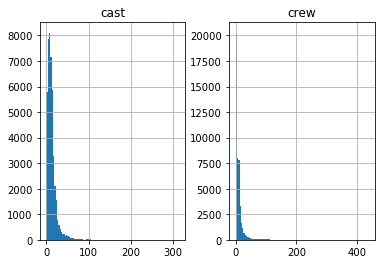

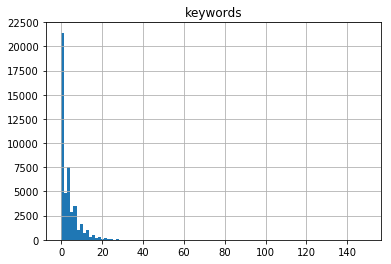

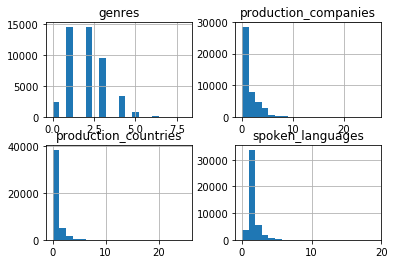

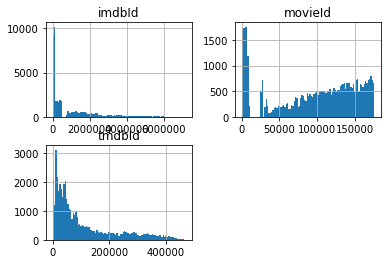

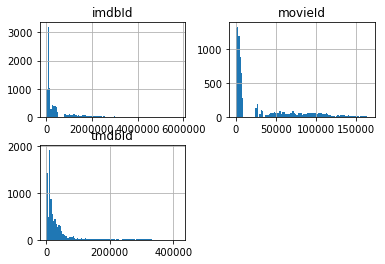

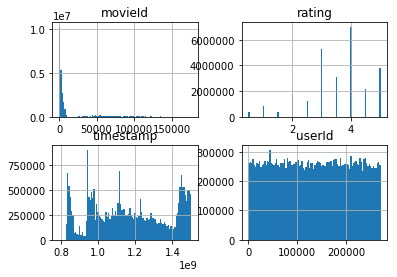

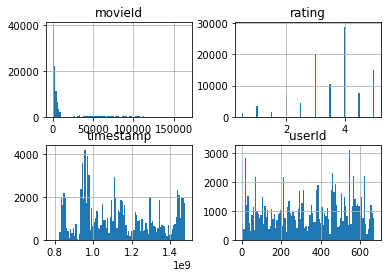

In [136]:
credits.drop("id",axis=1).applymap(lambda x:len(x.split("{"))-1).hist(bins=100); # eval is too slow!
keywords.drop("id",axis=1).applymap(lambda x:len(x.split("{"))-1).hist(bins=100); # eval is too slow!

movies_metadata[["genres","production_companies","production_countries","spoken_languages"]]\
    .dropna()\
    .applymap(lambda x:len(x.split("{"))-1)\
    .hist(bins=20);

links.hist(bins=100);
links_small.hist(bins=100);

ratings.hist(bins=100);
ratings_small.hist(bins=100);

In [204]:
## (3) The Movie Lends latest 58k movies

dataset = "Movie_Lens_Latest"
# informative README.txt!

# tagId,tag (1128,  2)
genome_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-tags.csv")

# movieId,imdbId,tmdbId (58,098,  3)
links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId,title,genres (58,098,  3)
# genres -> | separated list
#    Romance,Fantasy,IMAX,Action,Sci-Fi,Western,Drama,Horror,Mystery,Adventure,War,Comedy,Musical,Documentary,Thriller,
#    Film-Noir,(no genres listed),Crime,Animation,Children'
movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv")

# userId,movieId,tag,timestamp (1,108,997,  4)
# tags look user submitted - 74714 different tags - not consistent with genome_tags length/tagId range
tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# movieId,tagId,relevance (14,862,528,  3)
# each of 1128 tagIds x 13176 movieIds (dense matrix)
# relevance is machine learning output (inverse distribution)
genome_scores = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-scores.csv")

# userId,movieId,rating,timestamp (27,753,444,  4)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")



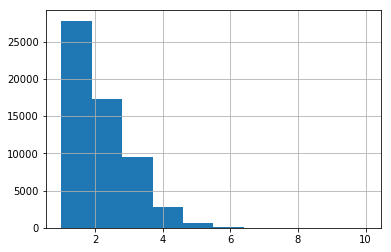

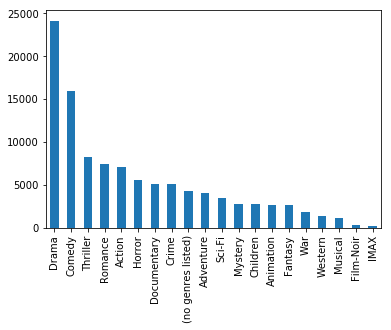

In [178]:
genre_list = list(set([item for sublist in movies["genres"].apply(lambda x: x.split("|")).values for item in sublist]))
genre_df = pd.DataFrame({genre: movies["genres"].apply(lambda x: x.split("|")).apply(lambda x: genre in x) for genre in genre_list})
movies["genres"].apply(lambda x: len(x.split("|"))).hist();
plt.figure()
genre_df.sum().sort_values(ascending=False).plot(kind='bar');



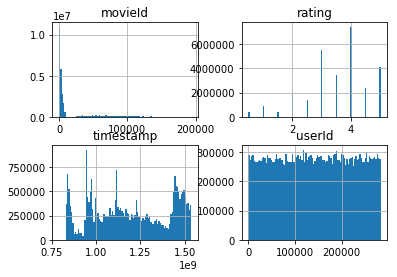

In [226]:
ratings.hist(bins=100);

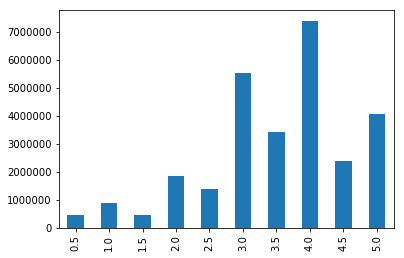

In [228]:
ratings["rating"].value_counts().sort_index().plot(kind='bar');

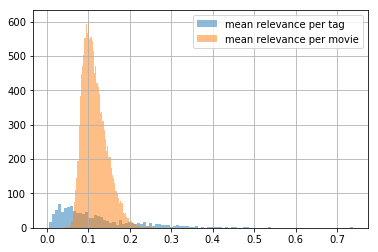

In [229]:
genome_scores.groupby("tagId")["relevance"].mean().hist(bins=100, alpha=.5, label="mean relevance per tag");
genome_scores.groupby("movieId")["relevance"].mean().hist(bins=100, alpha=.5, label="mean relevance per movie");
plt.legend();


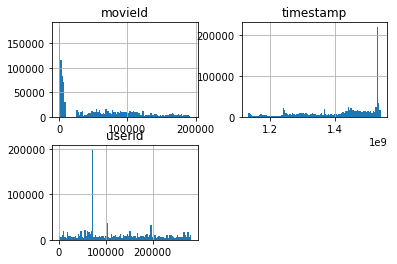

In [182]:
tags.hist(bins=100);

Text(0.5, 1.0, 'top 50 most common tags of 74714')

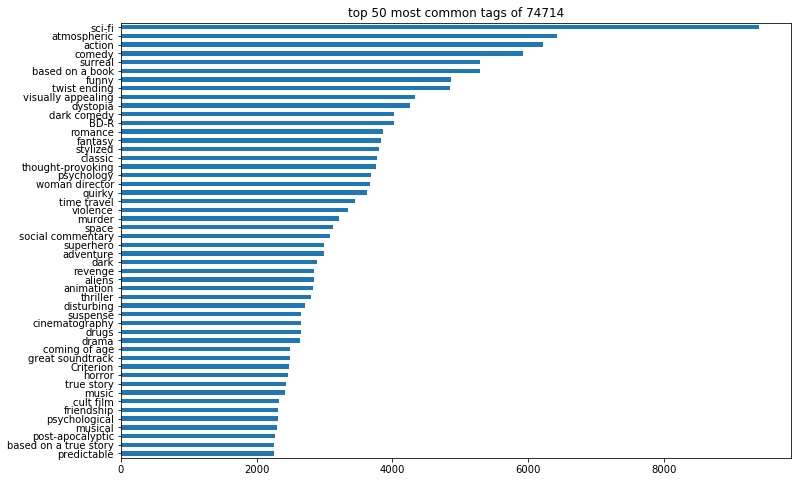

In [194]:
tags["tag"].value_counts().head(50).sort_values().plot(kind='barh', figsize=(12,8));
plt.title("top 50 most common tags of 74714");

In [237]:
%%time
tags_not_in_genome = tags["tag"].apply(lambda x:x not in genome_tags["tag"].values)

tags["tag"][~tags_not_in_genome].value_counts().head(50) # Length: 1101

tags["tag"][tags_not_in_genome].value_counts().head(50) # length =73613


# not clear what distinguishes tags they used from ones they didn't

Wall time: 49.9 s


In [14]:
## (4) Imdb data (not for commercial use!)

# https://www.imdb.com/interfaces/
# Subsets of IMDb data are available for access to customers for personal and non-commercial use.
# You can hold local copies of this data, and it is subject to our terms and conditions.

# Meh - this seems pretty unequivocal - guess I can look at it to get a sense of the origin of other datasets
    
dataset = "Imdb_non_commercial_use"

# tconst,averageRating,numVotes (933184, 3)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.tsv", sep='\t')

# tconst,parentTconst,seasonNumber,episodeNumber (4063014, 4)
episode = pd.read_csv(Dataset_directory+ dataset +os.sep+"episode.tsv", sep='\t')

# titleId,ordering,title,region,language,types,attributes,isOriginalTitle (3665052, 8)
akas = pd.read_csv(Dataset_directory+ dataset +os.sep+"akas.tsv", sep='\t')

# tconst,directors,writers (5862042, 3)
crew = pd.read_csv(Dataset_directory+ dataset +os.sep+"crew.tsv", sep='\t')

# tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres (5862042, 9)
basics = pd.read_csv(Dataset_directory+ dataset +os.sep+"basics.tsv", sep='\t')

# tconst,ordering,nconst,category,job,characters (33673177, 6)
principals = pd.read_csv(Dataset_directory+ dataset +os.sep+"principals.tsv", sep='\t')

In [38]:
## (5) Imdb scrape - *appears* to be acceptable (hosted on kaggle, hasn't been asked to take it down!)
# https://opendatacommons.org/licenses/dbcl/1.0/

dataset = "IMDB 5000 Movie Dataset"

# color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,
# actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,
# facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,
# title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes (5043, 28)

movie_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_metadata.csv")



In [47]:
movie_metadata.columns[movie_metadata.dtypes=='object']
# some small/smallish categorical - color, country, content_rating
# lot of very sparse huge categories (directors/actors)
# genres-> | list
# plot_keywords -> | list

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

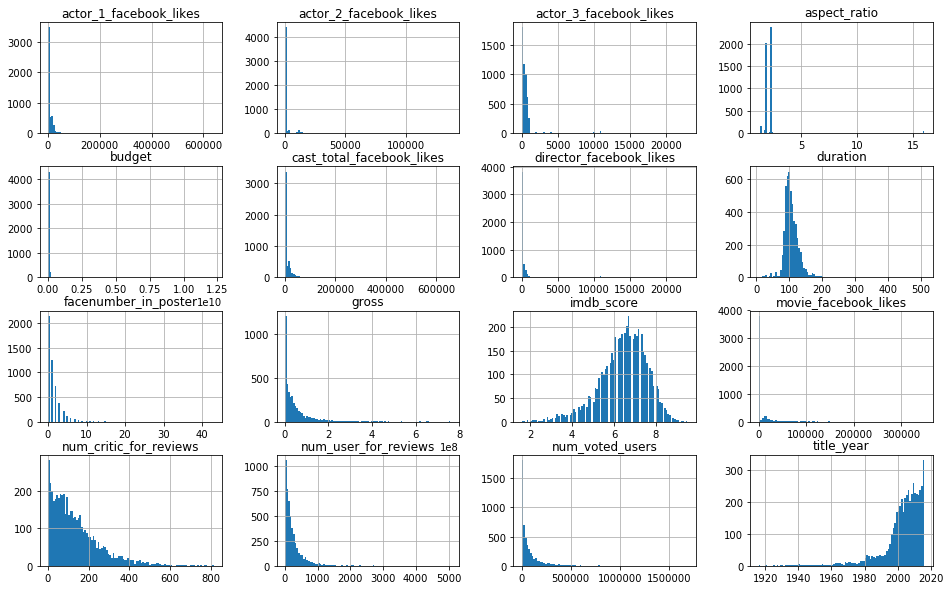

In [44]:
movie_metadata.hist(bins=100, figsize=(16,10));

In [561]:
## Final dataset - integrate
# (2) The Movies Database dataset 50k movies
    # cast, crew, movie data
    # TMB_credits
        # sparse: cast, crew
    # TMB_keywords
        # sparse: keywords
    # TMB_movies_metadata
    # TMB_movie_ratings    
# (3) latest update Media Lens set
    # tags, ratings, genres
# (1) PERSONALITY DATASET
    # ratings/individual personality big 5 x ratings
# (6) serendipity-sac2018
    # +tags/tag_genomes
    # SER_answers_by_movieId
    # SER_movie_ratings
# (7) learning-from-sets-2019
    # ratings on movies/sets of 5 movies
    # LEARN_movie_ratings
## MIGHT HAVE TO DROP THIS LAST
# (8) hetrec2011-movielens-2k-v2
    # rotten tomatoes data (and movie locations!)

    
# sparsity problem:
# tags, cast, crew, 
    
    
## Could notionally augment with the-numbers.com data

# not a lot of value-added

# Domestic, International, Worldwide Box Office
# Est. Domestic DVD Sales, Blu-ray Sales, Total
# Production Budget
# Domestic, International, Video Release
# MPAA Rating
# Running Time
# Franchise
# Keywords
# Source
# Genre
# Production Method
# Creative Type
# Production Companies
# Production Countries


# https://grouplens.org/datasets/movielens/latest/
# https://www.kaggle.com/rounakbanik/the-movies-dataset


# All datasets can be reconciled on movieId
# userId we can expect to only be consistent within each set



In [7]:
## (6) serendipity-sac2018
# https://grouplens.org/datasets/serendipity-2018/

dataset = "serendipity-sac2018"

# userId,movieId (3840, 2)
SER_recommendations = pd.read_csv(Dataset_directory+ dataset +os.sep+"recommendations.csv")

# userId,movieId,rating,timestamp,predictedRating,s1,s2,s3,s4,s5,s6,s7,s8,q,
# s_ser_rel,s_ser_find,s_ser_imp,s_ser_rec,m_ser_rel,m_ser_find,m_ser_imp,m_ser_rec (3840, 2)
# survey likert questions about 'serendipitous' (generally unpopular but they like) movies
# and then some inferred binary variables based on those answers
SER_answers = pd.read_csv(Dataset_directory+ dataset +os.sep+"answers.csv")

# ORIGINAL CSV HAS PROBLEMS (don't story comma separated list within "" ... and then *also* use "" for Jed "nickname" Jones)
# it's only 5-6 entries - manual fix is fine
# movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres (49174, 8)
# genres -> comma separated string list
# starring -> comma separated string list
# directedBy -> comma separated string list
SER_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv")

# userId,movieId,tag,timestamp (628157, 4)
SER_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# userId,movieId,rating,timestamp (9997850, 4)
SER_training = pd.read_csv(Dataset_directory+ dataset +os.sep+"training.csv")

# movieId,tag,relevance (12413640, 3)
SER_tag_genome = pd.read_csv(Dataset_directory+ dataset +os.sep+"tag_genome.csv")



SER_answers_by_movieId = SER_answers.groupby("movieId").mean().drop(["userId","timestamp"],axis=1)

# pick the most relevant tags/tags above certain relevance
SER_tag_genome[ SER_tag_genome["relevance"]>.5 ].groupby('movieId').count()["tag"].hist(bins=100)


SER_movie_ratings = SER_training[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
SER_movie_ratings = SER_movie_ratings.apply(pd.Series)
SER_movie_ratings.columns = ["n","ratings_mean","ratings_std"]


In [77]:
## (7) learning-from-sets-2019
# https://grouplens.org/datasets/learning-from-sets-of-items-2019/
# For this paper: https://www.thinkmind.org/download.php?articleid=eknow_2017_4_10_68011

dataset = "learning-from-sets-2019"

# userId,movieId_1,movieId_2,movieId_3,movieId_4,movieId_5,rating,timestamp (29516, 8)
LEARN_set_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"set_ratings.csv")

# userId,movieId,rating,timestamp (458970, 4)
LEARN_item_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"item_ratings.csv")


LEARN_movie_ratings = LEARN_item_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
LEARN_movie_ratings = LEARN_movie_ratings.apply(pd.Series)
LEARN_movie_ratings.columns = ["n","ratings_mean","ratings_std"]


In [564]:
## (8) hetrec2011-movielens-2k-v2
# https://grouplens.org/datasets/hetrec-2011/
# MovieLens + IMDb/Rotten Tomatoes

# Some restrictions on commercial use -> Have sent them a begging letter!

dataset = "hetrec2011-movielens-2k-v2"

# movieID,actorID,actorName,ranking (231742, 4)
HETREC_movie_actors = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_actors.dat", sep=r'\t', engine='python')

# movieID,country (10197, 2)
HETREC_movie_countries = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_countries.dat", sep=r'\t', engine='python')

# movieID,directorID,directorName (10155, 3)
HETREC_movie_directors = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_directors.dat", sep=r'\t', engine='python')

# movieID,genre (20809, 2)
HETREC_movie_genres = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_genres.dat", sep=r'\t', engine='python')

# movieID,location1,location2,location3,location4 (49167, 5)
HETREC_movie_locations = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_locations.dat", sep=r'\t', engine='python')

# movieID,tagID,tagWeight (51795, 3)
HETREC_movie_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_tags.dat", sep=r'\t', engine='python')

# id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,
# rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,
# rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,
# rtAudienceScore,rtPictureURL (10197, 21)
HETREC_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.dat", sep=r'\t', engine='python')

# id,value (13222, 2)
HETREC_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.dat", sep=r'\t', engine='python')

# userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second (855598, 9)
HETREC_user_ratedmovies = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_ratedmovies.dat", sep=r'\t', engine='python')

# userID,movieID,rating,timestamp (855598, 4)
HETREC_user_ratedmovies_timestamps = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_ratedmovies-timestamps.dat", sep=r'\t', engine='python')

# userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second (47957, 9)
HETREC_user_taggedmovies = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_taggedmovies.dat", sep=r'\t', engine='python')

# userID,movieID,tagID,timestamp (47957, 4)
HETREC_user_taggedmovies_timestamps = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_taggedmovies-timestamps.dat", sep=r'\t', engine='python')



In [8]:
## (2) The Movies Database dataset 50k movies

dataset = "The_Movies_Dataset"

# cast, crew, id (45476, 3)
# cast -> cast_id,character,credit_id,gender,id,name,order,profile_path
# crew -> credit_id,department,gender,id,job,name,profile_path
TMB_credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")

# id, keywords (46419, 2)
# keywords -> id,name
TMB_keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")

# movieId, imdbId, tmdbId (45843, 3)
TMB_links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId, imdbId, tmdbId (9125, 3)
TMB_links_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"links_small.csv")
# adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,
# poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,
# title,video,vote_average,vote_count (45466, 24)

# neither id or imdb_id is unique!

# genres -> id,name
# production_companies -> id,name
# production_countries -> iso_3166_1,name
# spoken_languages -> iso_639_1,name
# problems with this dataset
#    errant line-feed in the middle of tagline for row 29572
#    ""  19763
#    ""  35669 "Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche"
TMB_movies_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies_metadata.csv")

# problem with duplicates
TMB_movies_metadata.drop_duplicates(inplace=True)
# problem with near-duplicates (diff on "popularity" and "vote_count")
non_trivial_duplicate_ids = TMB_movies_metadata.drop_duplicates()["id"].value_counts()[TMB_movies_metadata.drop_duplicates()["id"].value_counts()>=2].index
df_dups = TMB_movies_metadata[ TMB_movies_metadata["id"].apply(lambda x: x in non_trivial_duplicate_ids) ][["id","vote_count","popularity"]].sort_values(by="id")
df_fix_dups = df_dups.groupby("id").apply(lambda x: [x.index[:-1],x.index[-1],x["vote_count"].max(), x["popularity"].mean()]).apply(lambda x: pd.Series(x))
df_fix_dups.columns = ["indices_to_remove","index_to_keep_and_update","vote_count","popularity"]

for row_ind in df_fix_dups.index:
    for remove_index in df_fix_dups.loc[row_ind,"indices_to_remove"]:
        TMB_movies_metadata.drop(remove_index, inplace=True)

    index_to_keep_and_update = df_fix_dups.loc[row_ind,"index_to_keep_and_update"]
    TMB_movies_metadata.loc[ index_to_keep_and_update,["vote_count","popularity"]]  = df_fix_dups.loc[row_ind,["vote_count","popularity"]]


# userId,movieId,rating,timestamp (26024289, 4)
TMB_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")
# userId,movieId,rating,timestamp (45466, 24)
TMB_ratings_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings_small.csv")

In [583]:
TMB_movies_metadata_safe = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies_metadata.csv")

# problem with duplicates
TMB_movies_metadata_safe.drop_duplicates(inplace=True)
# problem with near-duplicates (diff on "popularity" and "vote_count")
non_trivial_duplicate_ids = TMB_movies_metadata_safe.drop_duplicates()["id"].value_counts()[TMB_movies_metadata_safe.drop_duplicates()["id"].value_counts()>=2].index
df_dups = TMB_movies_metadata_safe[ TMB_movies_metadata_safe["id"].apply(lambda x: x in non_trivial_duplicate_ids) ][["id","vote_count","popularity"]].sort_values(by="id")
df_fix_dups = df_dups.groupby("id").apply(lambda x: [x.index[:-1],x.index[-1],x["vote_count"].max(), x["popularity"].mean()]).apply(lambda x: pd.Series(x))
df_fix_dups.columns = ["indices_to_remove","index_to_keep_and_update","vote_count","popularity"]

for row_ind in df_fix_dups.index:
    for remove_index in df_fix_dups.loc[row_ind,"indices_to_remove"]:
        TMB_movies_metadata_safe.drop(remove_index, inplace=True)

    index_to_keep_and_update = df_fix_dups.loc[row_ind,"index_to_keep_and_update"]
    TMB_movies_metadata_safe.loc[ index_to_keep_and_update,["vote_count","popularity"]]  = df_fix_dups.loc[row_ind,["vote_count","popularity"]]

In [10]:
# lot of small problems with this dataset!
# ids not reliable
# these two imdbIds were also definitely wrong
TMB_links_small.loc[ TMB_links_small["imdbId"].apply(lambda x: x in [81846,185906]), "imdbId" ]=np.nan

TMB_links_amalgamated = TMB_links.append(TMB_links_small).drop_duplicates().copy()
# TMB_links_amalgamated.isnull().sum()

TMB_links_amalgamated[ TMB_links_amalgamated["imdbId"].isnull() ]
# 7502 and 77658 throw an error for the movieId website
# https://movielens.org/movies/77658

# doesn't appear in the movie database either
# https://www.themoviedb.org/movie/191903-band-of-brothers -> band of brothers ... but broken
# https://www.themoviedb.org/movie/205300 -> just plain broken

TMB_links_amalgamated.drop([5173,7527],inplace=True)
TMB_links_amalgamated["imdbId"] = TMB_links_amalgamated["imdbId"].astype('int')

# TMB_links_amalgamated.isnull().sum()

drop_indices = [13446, 16880, 5574, 9378, 29684, 20100, 14023, 16278, 848, 20065, 12131, 45641, 13676, 34144, 2594, 11217, 45197, 33499, 21093, 14089, 9215, 15871, 4390, 1485, 15165, 17350, 14077, 9631, 34061, 13289]
TMB_links_amalgamated.loc[drop_indices,"tmdbId"] = np.nan

In [11]:
tmdb_to_imdb = TMB_movies_metadata[["id","imdb_id"]].copy()
tmdb_to_imdb["imdb_id"] = tmdb_to_imdb["imdb_id"].apply(lambda x: int(str(x)[2:]) if isinstance(x,str) else np.nan)
tmdb_to_imdb.loc[TMB_movies_metadata["imdb_id"].isnull(),"imdb_id"]= TMB_movies_metadata[["id","imdb_id"]][TMB_movies_metadata["imdb_id"].isnull()]["id"].apply(lambda x: TMB_links[TMB_links["tmdbId"]==x]["imdbId"].values[0])
tmdb_to_imdb["imdb_id"] = tmdb_to_imdb["imdb_id"].astype(int)
tmdb_to_imdb.isnull().sum()
# no duplicate values

id         0
imdb_id    0
dtype: int64

In [12]:
imdb_match_in_both_sets = TMB_links_amalgamated["imdbId"].apply(lambda x: x in tmdb_to_imdb["imdb_id"].values)
TMB_links_amalgamated.loc[imdb_match_in_both_sets,"tmdbId"] = TMB_links_amalgamated[imdb_match_in_both_sets]["imdbId"].apply(lambda x: tmdb_to_imdb[tmdb_to_imdb["imdb_id"]==x]["id"].values[0])

In [13]:
TMB_links_amalgamated.isnull().sum()

movieId      0
imdbId       0
tmdbId     246
dtype: int64

In [101]:
# duplicated_tmbIds = TMB_links_amalgamated["tmdbId"].value_counts()[TMB_links_amalgamated["tmdbId"].value_counts()>=2].index
# duplicated_tmbIds= duplicated_tmbIds.astype('int')
# len( duplicated_tmbIds )
# # all in the actual

In [87]:
# df = TMB_links_amalgamated.reset_index().dropna().astype(int)

# ML_movies_indexed_by_movieId = ML_movies.set_index('movieId').copy()
# TMB_movies_metadata_indexed_by_tmdbId = TMB_movies_metadata.set_index("id").copy()

# df["movieId_title"] = df["movieId"].apply(lambda x: ML_movies_indexed_by_movieId.loc[x]["title"] if (x in ML_movies_indexed_by_movieId.index) else np.nan)
# df["tmdbId_title"] = df["tmdbId"].apply(lambda x: TMB_movies_metadata_indexed_by_tmdbId.loc[x]["title"] if (x in TMB_movies_metadata_indexed_by_tmdbId.index) else np.nan)

# SER_movies_indexed_by_movieId = SER_movies.set_index("movieId").copy()
# SER_movies_indexed_by_movieId.columns = SER_movies_indexed_by_movieId.columns+"_SER"
# SER_movies_indexed_by_movieId

# df["SER_cols"] = df["movieId"].apply(lambda x: SER_movies_indexed_by_movieId.loc[x].values if (x in SER_movies_indexed_by_movieId.index) else np.nan)


# df["TMB_cols"] = df["tmdbId"].apply(lambda x: TMB_movies_metadata_indexed_by_tmdbId.loc[x,['release_date','overview']].values if (x in TMB_movies_metadata_indexed_by_tmdbId.index) else np.nan)



In [46]:
%%time
# 5mins
TMB_credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")
TMB_credits["cast"] = TMB_credits["cast"].apply(lambda x: eval(x))
TMB_credits["crew"] = TMB_credits["crew"].apply(lambda x: eval(x))
TMB_credits = TMB_credits.reset_index()
# force unique id

# duplicates in the case
drop_these = [25957, 8068, 7345, 5865, 30013, 25893, 23533, 25954, 25955, 13603, 13946, 5130, 24843, 21853, 25895, 16764, 11155, 13220, 13375, 24163, 15074, 25950, 2564, 676, 5710, 29387, 25956, 23043, 40051, 25894, 9576, 15765, 16167, 25949, 5535, 25953, 12066, 4114, 14000, 25896]
# duplicates in the crew
drop_these = drop_these+[25892, 21164, 25897, 25891]
TMB_credits.drop(drop_these, inplace=True)


TMB_crew = pd.concat(TMB_credits.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'TMB_credits_index': ser1["index"]}} for x in ser1["crew"]])
                            , axis=1).values, sort=False)
# only bug I can see - name reversed just once!
TMB_crew.loc[ TMB_crew["name"]  =="Ka-Fai Cheung","name"] = "Cheung Ka-Fai"

TMB_cast = pd.concat(TMB_credits.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'TMB_credits_index': ser1["index"]}} for x in ser1["cast"]])
                            , axis=1).values, sort=False)
TMB_cast = TMB_cast.reset_index().drop("index",axis=1)


Wall time: 4min 53s


In [500]:
TMB_crew["gender"].value_counts()
# 0: uncertain
# 1: female
# 2: male

0    272032
2    160711
1     31093
Name: gender, dtype: int64

In [47]:
%%time
TMB_crew.loc[ TMB_crew["id"]==1551219 ,"gender"] = 1 # Sally Boldt gender
TMB_crew.loc[ TMB_crew["id"]==1785844 ,"gender"] = 2# Peter Malota gender
TMB_crew.loc[ TMB_crew["id"]==56865, "profile_path"] = "/ZDOz1rqR5BijJlfBVW3stcWlwr.jpg"# Fruit Chan profile_path

TMB_crew_individuals = TMB_crew[["id","name","gender","profile_path"]].drop_duplicates().copy()
TMB_crew_individuals = TMB_crew_individuals.sort_values(by="id")
TMB_crew = TMB_crew.drop(["name","gender","profile_path"],axis=1)


credit_list = TMB_crew.groupby("id").apply(lambda x: x["credit_id"].values)
credit_number = TMB_crew.groupby("id").apply(lambda x: len(x["credit_id"]))

department_list = TMB_crew.groupby("id").apply(lambda x: x["department"].unique())
department_number = TMB_crew.groupby("id").apply(lambda x: len(x["department"].unique()))

job_list = TMB_crew.groupby("id").apply(lambda x: x["job"].unique())
job_number = TMB_crew.groupby("id").apply(lambda x: len(x["job"].unique()))

TMB_crew_individuals["credit_list"] = credit_list
TMB_crew_individuals["credit_number"] = credit_number
TMB_crew_individuals["department_list"] = department_list
TMB_crew_individuals["department_number"] = department_number
TMB_crew_individuals["job_list"] = job_list
TMB_crew_individuals["job_number"] = job_number

TMB_crew["order"] = TMB_crew.index

max_order = TMB_crew.groupby("TMB_credits_index").apply(lambda x: x["order"].max())
TMB_crew["max_order"] = TMB_crew.apply(lambda x: max_order.loc[x["TMB_credits_index"]],axis=1)
TMB_crew["fractional_order"] = TMB_crew["order"]/TMB_crew["max_order"]

mean_order = TMB_crew.groupby("id").apply(lambda x: x["order"].mean())
fractional_mean_order = TMB_crew.groupby("id").apply(lambda x: x["fractional_order"].mean())
order_list = TMB_crew.groupby("id").apply(lambda x: x["fractional_order"].values)

TMB_crew_individuals["mean_order"] = mean_order
TMB_crew_individuals["fractional_mean_order"] = fractional_mean_order
TMB_crew_individuals["order_list"] = order_list

Wall time: 4min 31s


In [529]:
TMB_crew_individuals["gender"].value_counts()

0    130109
2     25121
1      6345
Name: gender, dtype: int64

In [520]:
TMB_crew["department"].value_counts()
# Actors in here looks like a f***-up!

Production           94401
Writing              74759
Directing            58073
Sound                50548
Art                  40652
Camera               33506
Crew                 31572
Costume & Make-Up    30823
Editing              29795
Visual Effects       14842
Lighting              4846
Actors                  19
Name: department, dtype: int64

In [522]:
TMB_crew["job"].value_counts()

Director                          48999
Producer                          43507
Writer                            30398
Screenplay                        25143
Editor                            23770
Director of Photography           20640
Executive Producer                18853
Original Music Composer           15773
Casting                           12620
Art Direction                     11679
Costume Design                    11010
Production Design                 10524
Set Decoration                     7543
Music                              7333
Makeup Artist                      6400
Story                              5809
Novel                              5119
Script Supervisor                  4321
Cinematography                     4206
Camera Operator                    4123
Animation                          3828
Sound Re-Recording Mixer           3677
Associate Producer                 3592
Hairstylist                        3537
Co-Producer                        3182


In [50]:
# make names consistent
TMB_cast.loc[TMB_cast["id"]==9779,"name"]="Morris Chestnut"
TMB_cast.loc[TMB_cast["id"]==132233,"name"]="Tony Schiena"
TMB_cast.loc[TMB_cast["id"]==117642,"name"]="Jason Momoa"
TMB_cast.loc[TMB_cast["id"]==111690,"name"]="Takako Matsu"
TMB_cast.loc[TMB_cast["id"]==99692,"name"]="Liao Fan"
TMB_cast.loc[TMB_cast["id"]==23764,"name"]="Erika Eleniak"

TMB_cast.loc[TMB_cast["id"]==58646,"name"]="Damian Chapa"
TMB_cast.loc[TMB_cast["id"]==67212,"name"]="Tom Wu"
TMB_cast.loc[TMB_cast["id"]==72932,"name"]="Ryuhei Matsuda"
TMB_cast.loc[TMB_cast["id"]==78456,"name"]="Kimbo Slice"
TMB_cast.loc[TMB_cast["id"]==78809,"name"]="Rashad Evans"
TMB_cast.loc[TMB_cast["id"]==87637,"name"]="Masami Nagasawa"
TMB_cast.loc[TMB_cast["id"]==87662,"name"]="Issei Takahashi"
TMB_cast.loc[TMB_cast["id"]==74947,"name"]="Kitty Zhang Yuqi"

# Semka Sokolović-Bertok gender female
TMB_cast.loc[TMB_cast["id"]==4644,"gender"]=1
# Corey Johnson gender male
TMB_cast.loc[TMB_cast["id"]==17199,"gender"]=2
# Miles Malleson gender male
TMB_cast.loc[TMB_cast["id"]==47395,"gender"]=2
# Tusse Silberg gender female
TMB_cast.loc[TMB_cast["id"]==70883,"gender"]=1
# Rashad Evans gender male
TMB_cast.loc[TMB_cast["id"]==78809,"gender"]=2
# Kan Tokumaru gender male
TMB_cast.loc[TMB_cast["id"]==114733 ,"gender"]=2
# Georgie Glen gender female
TMB_cast.loc[TMB_cast["id"]==191752,"gender"]=1
# Joe B. Barton gender male
TMB_cast.loc[TMB_cast["id"]==935841 ,"gender"]=2
# Aleksander Sewruk gender male
TMB_cast.loc[TMB_cast["id"]==1135277,"gender"]=2
# Xavier Morales gender male
TMB_cast.loc[TMB_cast["id"]==1608740 ,"gender"]=2
# Peter Malota gender male
TMB_cast.loc[TMB_cast["id"]==1785844,"gender"]=2

# Oliver Reed
TMB_cast.loc[TMB_cast["id"]==936,"profile_path"]="/we10IusqRV1NHRtA68ftyck2N33.jpg"
# Marisol Correa
TMB_cast.loc[TMB_cast["id"]==1634622,"profile_path"]="/xKFZXYUGZGZdiJSJOtEKhvMo7K2.jpg"
# Xavier Morales
TMB_cast.loc[TMB_cast["id"]==1608740,"profile_path"]="/cXb0xksR2SmuJEoUCOIr7NyBZRt.jpg"
# Mario De Candia
TMB_cast.loc[TMB_cast["id"]==1331602,"profile_path"]="/mkgLRMZHgQQ4PM8KbidOACnorSc.jpg"
# Duke Jackson
TMB_cast.loc[TMB_cast["id"]==1200780,"profile_path"]="/7Yn7BVgep48QNAf5cAjzMQl0a13.jpg"

# Aleksander Sewruk
TMB_cast.loc[TMB_cast["id"]==1135277,"profile_path"]="/prcO9VZBcQS4FhxATbVzDr1005A.jpg"
# Antonella Vitalea
TMB_cast.loc[TMB_cast["id"]==228167,"profile_path"]="/aPIAkjn75D1iYsgFJMvZ62WvMOx.jpg"
# Kim Kardashian
TMB_cast.loc[TMB_cast["id"]==212225,"profile_path"]="/xUZiyy7GNAJIp69tTiKxDbFqOOq.jpg"

# Zhou Dongyu
TMB_cast.loc[TMB_cast["id"]==145092,"profile_path"]="/fmR9dO5cxrcwk5bjENU4eNITgLi.jpg"
# Ted Markland
TMB_cast.loc[TMB_cast["id"]==136195,"profile_path"]="/orBobhJSFxq1TgRM9qKv0lJwV9v.jpg"

# Nigel Bruce
TMB_cast.loc[TMB_cast["id"]==3363,"profile_path"]="/kI8j8WGjDay9ovWnoTrqvcKYtN3.jpg"

# Susanne Zenor
TMB_cast.loc[TMB_cast["id"]==99888,"profile_path"]="/2ppMruL72FDz5Q0xIcGaFxwCDI6.jpg"
# Lilyan Tashman
TMB_cast.loc[TMB_cast["id"]==104018,"profile_path"]="/e1vaEiwuglqOYZXvbCX4KLgALeI.jpg"
# Takako Matsu
TMB_cast.loc[TMB_cast["id"]==111690,"profile_path"]="/xUZiyy7GNAJIp69tTiKxDbFqOOq.jpg"
# Juri Ueno
TMB_cast.loc[TMB_cast["id"]==115647,"profile_path"]="/ljEYwsNS5u9gtboxXSGQSopuFT2.jpg"
# Nello Mascia
TMB_cast.loc[TMB_cast["id"]==128045,"profile_path"]="/v8h4Ypnu6YVHKER3R4u3THdGAq.jpg"

df= TMB_cast.groupby("id").apply(lambda x: len( x["profile_path"].unique() )).sort_values(ascending=False)
name_duplicates = df[df>=2].index

id_profile_path_replace_list = TMB_cast.loc[TMB_cast.apply(lambda x: x["id"] in name_duplicates, axis=1)].sort_values(by="id").groupby("id").apply(lambda x: x["profile_path"].value_counts().index[0])

for index in id_profile_path_replace_list.index:
    TMB_cast.loc[TMB_cast["id"]==index,"profile_path"]=id_profile_path_replace_list[index]
    
# multiple Varvara Dvalishvili
TMB_cast.drop([145947, 145948, 145949, 145950, 145951, 145952] ,inplace=True)
# multiple Roshanak Gerami
TMB_cast.drop([374534, 374535, 374536, 374537, 374538] ,inplace=True)    

In [636]:
# TMB_cast.loc[TMB_cast["name"]=="Roshanak Gerami"].index

In [635]:
# TMB_cast.loc[TMB_cast.apply(lambda x: x["name"] == "Sam Harris", axis=1)].sort_values(by="id")

In [ ]:
TMB_cast.describe(include="all")

In [ ]:
TMB_cast_individuals.describe(include="all")

In [242]:
TMB_cast_individuals = TMB_cast[["gender","id","name","profile_path"]].drop_duplicates().sort_values(by="id",ascending=True).copy()

TMB_cast = TMB_cast.drop(["name","gender","profile_path"],axis=1)

credit_list = TMB_cast.groupby("id").apply(lambda x: x["credit_id"].values)
credit_number = TMB_cast.groupby("id").apply(lambda x: len(x["credit_id"]))

TMB_cast_individuals["credit_list"] = credit_list
TMB_cast_individuals["credit_number"] = credit_number


max_order = TMB_cast.groupby("TMB_credits_index").apply(lambda x: x["order"].max())
TMB_cast["max_order"] = TMB_cast.apply(lambda x: max_order.loc[x["TMB_credits_index"]],axis=1)
TMB_cast["fractional_order"] = TMB_cast["order"]/TMB_cast["max_order"]

mean_order = TMB_cast.groupby("id").apply(lambda x: x["order"].mean())
fractional_mean_order = TMB_cast.groupby("id").apply(lambda x: x["fractional_order"].mean())
order_list = TMB_cast.groupby("id").apply(lambda x: x["order"].values)

TMB_cast_individuals["mean_order"] = mean_order
TMB_cast_individuals["fractional_mean_order"] = fractional_mean_order
TMB_cast_individuals["order_list"] = order_list


KeyError: "['gender', 'profile_path', 'name'] not in index"

In [243]:
order_list = TMB_cast.groupby("id").apply(lambda x: x["order"].values)

In [244]:
TMB_cast_individuals["order_list"] = order_list

In [343]:
TMB_credits["movieId"] = TMB_credits["id"].apply(lambda x: tmd_to_movie_id.loc[x])

In [83]:
TMB_links_amalgamated.loc[45843] = [5269, 254686, 1791]
TMB_links_amalgamated.loc[45844] = [7880, 295743, 45044]
TMB_links_amalgamated.drop([4148, 8112, 45641, 29684, 34144, 34061],inplace=True)

tmd_to_movie_id = TMB_links_amalgamated.dropna().set_index('tmdbId')["movieId"].drop_duplicates()
# 219 nulls in index
TMB_credits["movieId"] = TMB_credits["id"].apply(lambda x: tmd_to_movie_id.loc[x])
# TMB_keywords["movieId"] =  TMB_keywords["id"].apply(lambda x: tmd_to_movie_id.loc[x])

TMB_movies_metadata["movieId"] = TMB_movies_metadata["id"].apply(lambda x: tmd_to_movie_id.loc[x])

TMB_movie_ratings = TMB_ratings.append(TMB_ratings_small)[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
TMB_movie_ratings = TMB_movie_ratings.apply(pd.Series)
TMB_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
TMB_movie_ratings['n'] = TMB_movie_ratings['n'].astype('int')


In [223]:
dataset = "The_Movies_Dataset"
TMB_keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")
TMB_keywords["movieId"] =  TMB_keywords["id"].apply(lambda x: tmd_to_movie_id.loc[x])
TMB_keywords["keywords"].drop_duplicates(inplace=True)
TMB_keywords["keywords"] = TMB_keywords["keywords"].apply(lambda x: eval(x))
TMB_keywords.dropna(inplace=True)

TMB_keys = pd.concat(TMB_keywords.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'movieId': ser1["movieId"]}} for x in ser1["keywords"]])
                            , axis=1).values, sort=False)

TMB_keys = TMB_keys.groupby("movieId", group_keys=True).apply(lambda x: [x["name"].values[0],x["movieId"].values, len(x["movieId"].values)]).apply(lambda x:pd.Series(x)).reset_index()

TMB_keys.columns = ["id", "name", "movieId_list", "frequency"]
TMB_keys = TMB_keys.sort_values(by="frequency", ascending=False)



TMB_keywords["keyword_id_list"] = TMB_keywords["keywords"].apply(lambda x: [ser['id'] for ser in x] if x else np.nan)
TMB_keywords["num_keywords"] = TMB_keywords["keywords"].apply(lambda x: len(x))
TMB_keywords.drop("keywords",axis=1, inplace=True)
TMB_keywords.drop("id",axis=1, inplace=True)
TMB_keywords.dropna(inplace=True)

TypeError: string indices must be integers

In [552]:
TMB_cast["gender"].value_counts()

2    226555
0    223765
1    111724
Name: gender, dtype: int64

In [555]:
TMB_cast["character"].value_counts(dropna=False)

                              25766
Himself                       11431
Herself                        3068
Doctor                          663
Dancer                          583
Narrator                        561
Reporter                        545
himself                         542
Nurse                           499
(uncredited)                    472
Anna                            464
Additional Voices (voice)       449
Paul                            446
Sam                             443
Policeman                       419
Maria                           415
Frank                           414
Sarah                           407
Bartender                       398
Himself (archive footage)       391
David                           390
Jack                            384
Charlie                         358
John                            353
Mike                            349
Waitress                        348
Peter                           344
Mother                      

In [230]:
TMB_keys.drop("id",axis=1,inplace=True)

In [238]:
TMB_cast

,cast_id,character,credit_id,id,order,max_order,fractional_order,movieId
0,14,Woody (voice),52fe4284c3a36847f8024f95,31,0,12,0.000000,1
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,12898,1,12,0.083333,1
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,7167,2,12,0.166667,1
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,12899,3,12,0.250000,1
4,18,Rex (voice),52fe4284c3a36847f8024fa5,12900,4,12,0.333333,1
5,19,Hamm (voice),52fe4284c3a36847f8024fa9,7907,5,12,0.416667,1
6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,8873,6,12,0.500000,1
7,26,Andy (voice),52fe4284c3a36847f8024fc1,1116442,7,12,0.583333,1
8,22,Sid (voice),52fe4284c3a36847f8024fb1,12901,8,12,0.666667,1
9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,12133,9,12,0.750000,1


In [245]:
TMB_cast_individuals

,gender,id,name,profile_path,credit_list,credit_number,mean_order,fractional_mean_order,order_list
6891,2,1,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,NaN,NaN,NaN,NaN,NaN
4246,2,2,Mark Hamill,/ws544EgE5POxGJqq9LUfhnDrHtV.jpg,"[57dd656d9251416ce80000d1, 52fe4233c3a36847f80...",7.0,8.142857,0.420588,"[16, 10, 4, 10, 6, 5, 6]"
133,2,3,Harrison Ford,/7CcoVFTogQgex2kJkXKMe8qHZrC.jpg,"[555a0f0392514160540008e4, 52fe44e6c3a36847f80...",40.0,4.750000,0.251727,"[12, 8, 5, 6, 2, 19, 1, 7, 2, 1, 3, 1, 3, 3, 1..."
4248,1,4,Carrie Fisher,/pbleNurCYdrLFQMEnlQB2nkOR1O.jpg,NaN,NaN,NaN,NaN,NaN
4249,2,5,Peter Cushing,/fg7ufC0IMr6VasQzzdmTtX5ycQF.jpg,NaN,NaN,NaN,NaN,NaN
4251,2,6,Anthony Daniels,/cljvryjb3VwTsNR7fjQKjNPMaBB.jpg,"[52fe44dac3a36847f80adfd9, 52fe436dc3a36847f80...",26.0,5.038462,0.389184,"[15, 7, 4, 7, 7, 3, 4, 3, 2, 7, 5, 6, 4, 8, 6,..."
52472,2,7,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,[52fe447ac3a36847f8098611],1.0,21.000000,0.954545,[21]
52478,2,8,Lee Unkrich,/bdTCCXjgOV3YyaNmLGYGOxFQMOc.jpg,"[52fe447ac3a36847f80986f7, 52fe45aec3a368484e0...",14.0,7.000000,0.328566,"[7, 6, 6, 4, 4, 43, 4, 1, 7, 3, 4, 3, 1, 5]"
81337,2,10,Bob Peterson,/13YNM8lBKnK26MYd2Lp3OpU6JdI.jpg,NaN,NaN,NaN,NaN,NaN
187173,2,11,David Reynolds,/hLILKC4zUJUcHjdCI7U4GN2cz5A.jpg,NaN,NaN,NaN,NaN,NaN


In [91]:
TMB_credits_index_to_movieId = TMB_credits[["index","movieId"]].set_index("index")
TMB_crew["movieId"] =TMB_crew["TMB_credits_index"].apply(lambda x: TMB_credits_index_to_movieId.loc[x])
TMB_cast["movieId"] =TMB_cast["TMB_credits_index"].apply(lambda x: TMB_credits_index_to_movieId.loc[x])

In [97]:
TMB_crew.drop("TMB_credits_index",axis=1,inplace=True)
TMB_cast.drop("TMB_credits_index",axis=1,inplace=True)


In [247]:
TMB_cast_individuals.to_csv(Dataset_directory+"TMB_cast_individuals.csv")


In [ ]:
# TMB_movies_metadata
#    tmdb_to_imdb -> DONE it's job

# TMB_links_amalgamated

# TMB_keywords
#    TMB_keys

# TMB_credits -> DONE it's job
#    TMB_crew
#       TMB_crew_individuals
#    TMB_cast
#       TMB_crew_individuals

In [96]:
TMB_movies_metadata.dtypes

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
movieId                   object
dtype: object

In [95]:
TMB_movies_metadata.shape

(45433, 25)

In [94]:
TMB_movies_metadata.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.543300e+04,45433.000000,45433.000000,4.543300e+04,45176.000000,45433.000000,45433.000000
mean,4.224549e+06,108375.226179,2.921007,1.121214e+07,94.123672,5.618339,109.929545
std,1.742799e+07,112479.760366,6.006385,6.435007e+07,38.414532,1.924097,491.450762
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26461.000000,0.385850,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,59996.000000,1.127377,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157351.000000,3.677943,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [93]:
TMB_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId'],
      dtype='object')

In [92]:
TMB_movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415,1
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,2
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92,3
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34,4
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173,5
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886,6
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141,7
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45,8
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174,9
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194,10


In [395]:
TMB_movies_metadata["movieId"] = TMB_movies_metadata["id"].apply(lambda x: tmd_to_movie_id.loc[x])
TMB_movies_metadata.index = TMB_movies_metadata["movieId"]

In [415]:
# adult
TMB_movies_metadata["adult"] = TMB_movies_metadata["adult"].astype('int')
TMB_movies_metadata["adult"].value_counts()
# super valuable feature!

0    45424
1        9
Name: adult, dtype: int64

In [412]:
# belongs_to_collection
# mostly null: 40945 nulls | 4488 notnulls


In [ ]:
belongs_to_collection = pd.concat( TMB_movies_metadata[TMB_movies_metadata["belongs_to_collection"].notnull()].apply(lambda ser1: pd.DataFrame( [eval(ser1["belongs_to_collection"])], index = [ser1["movieId"]] )
                                                                                       ,axis=1).values, sort=False)

belongs_to_collection = belongs_to_collection.reset_index()
belongs_to_collection.columns = ['movieId', 'backdrop_path', 'id', 'name', 'poster_path']

collections = belongs_to_collection[['backdrop_path', 'id', 'name', 'poster_path']].drop_duplicates()
collections = collections.sort_values(by="id")
belongs_to_collection = belongs_to_collection[["movieId","id"]]

collections["movieId_list"] = belongs_to_collection.groupby("id").apply(lambda x: x["movieId"].values).values
collections["collection_size"] = belongs_to_collection.groupby("id").apply(lambda x: len(x["movieId"])).values

TMB_movies_metadata.loc[belongs_to_collection["movieId"],"belongs_to_collection"] = belongs_to_collection.set_index("movieId")["id"]
TMB_movies_metadata["belongs_to_collection"] = TMB_movies_metadata["belongs_to_collection"].astype('float')
# del belongs_to_collection

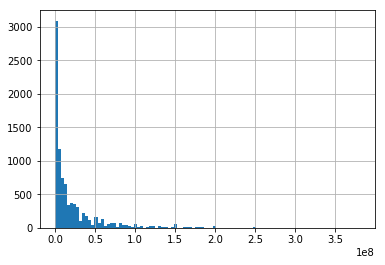

In [416]:
TMB_movies_metadata["budget"] = TMB_movies_metadata["budget"].replace(0,np.nan)
TMB_movies_metadata["budget"].hist(bins=100);
# 8,880 notnulls, 36,553 nulls
# LOT of 0's!

1    14552
2    14471
3     9578
4     3377
0     2442
5      829
6      157
7       24
8        3
Name: genres, dtype: int64

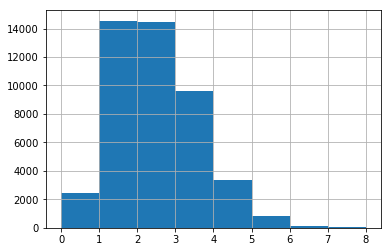

In [460]:
# genres, no nulls
num_genres_per_movie = TMB_movies_metadata["genres"].apply(lambda x: len(eval(x)))
num_genres_per_movie.hist(bins=num_genres.max());
num_genres_per_movie.value_counts()

In [479]:
flat_list = [item for sublist in TMB_movies_metadata["genres"].apply(lambda x: eval(x)).values for item in sublist]
genres = pd.DataFrame(flat_list).drop_duplicates().sort_values(by="id")
genre_list = TMB_movies_metadata["genres"].apply(lambda x: eval(x)).apply(lambda x: [y['id'] for y in x])
genres["movieId_list"] = genres.apply(lambda x: genre_list[genre_list.apply(lambda y: x["id"] in y)].index.values ,axis=1)


In [509]:
for gen_ind in genres.index:
    gen_name = "genres_"+genres.loc[gen_ind,"name"]
    TMB_movies_metadata.loc[genres.loc[gen_ind,"movieId_list"],gen_name] = 1
    TMB_movies_metadata[gen_name] = TMB_movies_metadata[gen_name].replace(np.nan,0).astype('int')
    
TMB_movies_metadata["num_genres_per_movie"]=num_genres_per_movie

In [513]:
# homepage 37659 nulls, 7774 notnulls
TMB_movies_metadata["homepage"].value_counts()

# features -> present/not present?
# number of films point at same website?


http://www.georgecarlin.com                                                          12
http://www.wernerherzog.com/films-by.html                                             7
http://breakblade.jp/                                                                 6
http://www.kungfupanda.com/                                                           4
http://www.transformersmovie.com/                                                     4
http://www.missionimpossible.com/                                                     4
http://phantasm.com                                                                   4
http://www.thehungergames.movie/                                                      4
http://www.crownintlpictures.com/ostitles.html                                        4
http://www.crownintlpictures.com/tztitles.html                                        4
http://www.crownintlpictures.com/actitles.html                                        4
http://www.workandtheglory.com/ 

In [515]:
# id, imdb_id -> drop - we have a separate table just for these!
TMB_movies_metadata.drop(["id","imdb_id"],axis=1,inplace=True)

In [519]:
# original_language 11 nulls, 45422 notnulls
# 89 different languages
# looks like https://www.sitepoint.com/iso-2-letter-language-codes/
# https://gist.github.com/alexanderjulo/4073388
# https://pypi.org/project/iso-639/ (looks nice, but want to avoid too many modules!)
TMB_movies_metadata["original_language"].value_counts()

en    32251
fr     2436
it     1529
ja     1347
de     1079
es      994
ru      826
hi      508
ko      444
zh      409
sv      383
pt      316
cn      313
fi      295
nl      248
da      224
pl      219
tr      150
cs      130
el      113
no      106
fa      100
hu      100
ta       78
th       75
he       67
sr       63
ro       57
te       45
ar       39
      ...  
eu        3
ky        3
kn        3
kk        3
ps        2
pa        2
am        2
lo        2
ne        2
bo        2
iu        2
mn        2
af        2
lb        1
la        1
gl        1
qu        1
zu        1
hy        1
tg        1
uz        1
cy        1
rw        1
eo        1
sm        1
fy        1
ay        1
mt        1
si        1
jv        1
Name: original_language, Length: 89, dtype: int64

In [520]:
TMB_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movieId',
       'genres_Adventure', 'genres_Fantasy', 'genres_Animation',
       'genres_Drama', 'genres_Horror', 'genres_Action', 'genres_Comedy',
       'genres_History', 'genres_Western', 'genres_Thriller', 'genres_Crime',
       'genres_Documentary', 'genres_Science Fiction', 'genres_Mystery',
       'genres_Music', 'genres_Romance', 'genres_Family', 'genres_War',
       'genres_Foreign', 'genres_TV Movie'],
      dtype='object')

In [521]:
# spoken_languages 0 nulls

0

1     33715
2      5368
0      3827
3      1705
4       549
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

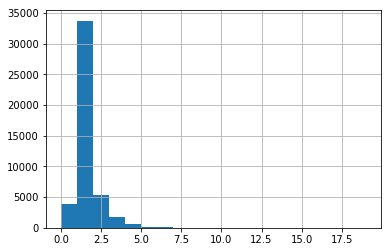

In [530]:
num_langs_per_movie = TMB_movies_metadata["spoken_languages"].apply(lambda x: len(eval(x)))
num_langs_per_movie.hist(bins=num_langs_per_movie.max());
num_langs_per_movie.value_counts()

In [531]:
flat_list = [item for sublist in TMB_movies_metadata["spoken_languages"].apply(lambda x: eval(x)).values for item in sublist]
langs = pd.DataFrame(flat_list).drop_duplicates()

original_language_frequency = langs.set_index('iso_639_1').loc[TMB_movies_metadata["original_language"].dropna()].reset_index()["iso_639_1"].value_counts()

langs = langs.set_index('iso_639_1')
langs.loc[original_language_frequency.index, "original_language_frequency"] = original_language_frequency.values

langs["original_language_frequency"] = langs["original_language_frequency"].replace(np.nan, 0)

langs["original_language_frequency"] = langs["original_language_frequency"].astype('int')
langs = langs.sort_values(by="original_language_frequency", ascending=False)
langs = langs.reset_index()
langs["id"]=langs.index


In [568]:
TMB_movies_metadata["original_language"] = TMB_movies_metadata_safe["original_language"].apply(lambda x: langs[langs['iso_639_1']==x]["id"].values[0] if pd.notnull(x) else np.nan).values

TMB_movies_metadata["original_language"] = TMB_movies_metadata_safe["original_language"][TMB_movies_metadata_safe["original_language"].isnull()].apply(lambda x: langs[langs['iso_639_1']==x]["id"].values[0] if not pd.isnull(x) else np.nan)
TMB_movies_metadata["spoken_languages"] = TMB_movies_metadata["spoken_languages"].apply(lambda x: eval(x)).apply(lambda ln_dicts: [ langs[langs["iso_639_1"]==ln['iso_639_1']].index[0] for ln in ln_dicts])
TMB_movies_metadata["num_langs_per_movie"] = num_langs_per_movie

In [662]:
TMB_movies_metadata.to_csv(Dataset_directory+"TMB_movies_metadata.csv")

In [168]:
## (3) The Movie Lends latest 58k movies

dataset = "Movie_Lens_Latest"
# informative README.txt!

# tagId,tag (1128,  2)
ML_genome_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-tags.csv")

# movieId,imdbId,tmdbId (58,098,  3)
ML_links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId,title,genres (58,098,  3)
# genres -> | separated list
#    Romance,Fantasy,IMAX,Action,Sci-Fi,Western,Drama,Horror,Mystery,Adventure,War,Comedy,Musical,Documentary,Thriller,
#    Film-Noir,(no genres listed),Crime,Animation,Children'
ML_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv")

# userId,movieId,tag,timestamp (1,108,997,  4)
# tags look user submitted - 74714 different tags - not consistent with genome_tags length/tagId range
ML_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# movieId,tagId,relevance (14,862,528,  3)
# each of 1128 tagIds x 13176 movieIds (dense matrix)
# relevance is machine learning output (inverse distribution)
ML_genome_scores = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-scores.csv")

# userId,movieId,rating,timestamp (27,753,444,  4)
ML_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")


In [312]:
ML_movie_ratings = ML_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
ML_movie_ratings = ML_movie_ratings.apply(pd.Series)
ML_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
ML_movie_ratings['n'] = TMB_movie_ratings['n'].astype('int')

In [8]:
## (1) PERSONALITY DATASET

personality_dataset = "personality-isf2018"

# userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,
# assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,
# predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,
# predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,
# movie_12,predicted_rating_12,is_personalized,enjoy_watching (1834, 34)
PERS_personality_data = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"personality-data.csv")

# userid,movieId,rating,tstamp (1028751, 4)
PERS_ratings = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"ratings.csv")

# remove random spaces in column names!
PERS_personality_data.columns = [x.strip() for x in PERS_personality_data.columns]

# remove random spaces and deal with typo in userid
PERS_ratings.columns = ['userid', 'movieId', 'rating', 'tstamp']


# big-5 correlation with specific movie ratings


# PERS_ratings_and_big5["movieId"].value_counts()

# some movies get ~1500 ratings, mean is 30, many get only 1, trim out the 1s and mean jumps to ~60

In [343]:
%%time
PERS_movie_ratings = PERS_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
PERS_movie_ratings = PERS_movie_ratings.apply(pd.Series)
PERS_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
PERS_movie_ratings

Wall time: 26.1 s


In [707]:
# 

In [ ]:
# 35196 movieIds
# 11092 movies with only 1 rating
# 20311 movies with only <5 ratings

In [46]:
def get_big5_corr(df):
    (openness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["openness"] )
    if p>.05: openness_corr = np.nan
        
    openness_mean = df["openness"].mean()
    openness_std = df["openness"].std()

    (agreeableness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["agreeableness"] )
    if p>.05: agreeableness_corr = np.nan
        
    agreeableness_mean = df["agreeableness"].mean()
    agreeableness_std = df["agreeableness"].std()
    
    (emotional_stability_corr, p, n) = corr_simple_pearsonr( df["rating"],df["emotional_stability"] )
    if p>.05: emotional_stability_corr = np.nan
        
    emotional_stability_mean = df["emotional_stability"].mean()
    emotional_stability_std = df["emotional_stability"].std()
    
    (conscientiousness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["conscientiousness"] )
    if p>.05: conscientiousness_corr = np.nan
        
    conscientiousness_mean = df["conscientiousness"].mean()
    conscientiousness_std = df["conscientiousness"].std()
    
    (extraversion_corr, p, n) = corr_simple_pearsonr( df["rating"],df["extraversion"] )
    if p>.05: extraversion_corr = np.nan
        
    extraversion_mean = df["extraversion"].mean()
    extraversion_std = df["extraversion"].std()
    
    rating_mean = df["rating"].mean()
    rating_std = df["rating"].std()
        
    

    return [n, openness_corr, agreeableness_corr, emotional_stability_corr, conscientiousness_corr, extraversion_corr,
           openness_mean, openness_std, agreeableness_mean, agreeableness_std, emotional_stability_mean, emotional_stability_std,
           conscientiousness_mean, conscientiousness_std, extraversion_mean, extraversion_std, rating_mean, rating_std]       

In [47]:
# %debug

In [48]:
# per movie (where num ratings >=2)
    # rating mean, rating sd, corr with big 5(p<0.05)
# can compare to big5xrating correlation cross all movies

In [49]:
big5 = ['openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion']
PERS_userid_by_big5 = PERS_personality_data[['userid']+big5].groupby('userid').mean()

In [50]:
PERS_ratings_and_big5 = PERS_ratings[["movieId","rating"]].copy()
PERS_ratings_and_big5[big5] = PERS_userid_by_big5.loc[ PERS_ratings["userid"] ].reset_index()[big5]
movies_rated_2_or_more_times = PERS_ratings_and_big5["movieId"].value_counts()[PERS_ratings_and_big5["movieId"].value_counts()>=2].index

In [51]:
%%time
# guess ~7 mins
# .loc[movies_rated_2_or_more_times]
big5_corr = PERS_ratings_and_big5.set_index('movieId').reset_index().groupby('movieId').apply(lambda x: get_big5_corr(x))

Wall time: 7min 52s


In [ ]:
big5_corr_df = big5_corr.apply(pd.Series)
big5_corr_df.columns = ['n']+big5+["openness_mean", "openness_std", "agreeableness_mean", "agreeableness_std", "emotional_stability_mean", "emotional_stability_std",
           "conscientiousness_mean", "conscientiousness_std", "extraversion_mean", "extraversion_std", "rating_mean", "rating_std"]
big5_corr_df.to_csv(Dataset_directory+"big5_corr.csv")
big5_corr_df.isnull().sum()

In [342]:
big5_corr_df["n"] = big5_corr_df["n"].astype('int')
PERS_big5_corr_df = big5_corr_df.copy()

In [327]:
intersection( big5_corr_df[big5_corr_df["openness_mean"]==big5_corr_df["openness_mean"].max()].index,
              ML_movies["movieId"] )

600

In [334]:
## save it


In [336]:
var1 = "conscientiousness_mean"

ML_movies.set_index('movieId').loc[ intersection( big5_corr_df[big5_corr_df[var1]==big5_corr_df[var1].min()].index,
              ML_movies["movieId"] ) ].head(10)

,title,genres
movieId,,
76776,Pigsty (Porcile) (1969),Drama|Mystery
154792,I Embrace You With 1000 Arms (2006),Drama
169260,Germany: A Summer's Fairytale (2006),Documentary
92751,Kokowääh (2011),Comedy
119184,Bad Karma (1991),Horror
192851,Love Is All (2007),Comedy|Romance
162836,The Greggs (2014),(no genres listed)
70488,Wings of Hope (Julianes Sturz in den Dschungel...,Adventure|Documentary
118458,H6: Diario de un asesino (2005),Horror|Thriller


In [332]:
var1 = "openness_mean"

ML_movies.set_index('movieId').loc[ intersection( big5_corr_df[big5_corr_df[var1]==big5_corr_df[var1].min()].index,
              ML_movies["movieId"] ) ].head(10)

,title,genres
movieId,,
41402,Lorna (1964),Drama
177531,Fast Company (1979),Drama
164135,Bangkok Traffic Love Story (2009),Comedy|Romance
83583,Distance (2001),Drama


Int64Index([  1528,   2603,   3651,   4455,   4456,   4460,   4906,   5286,
              5616,   5922,
            ...
            196727, 197033, 197043, 197495, 197689, 197713, 197901, 197903,
            197955, 198091],
           dtype='int64', name='movieId', length=649)

In [333]:
big5_corr_df.columns

Index(['n', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'openness_mean', 'openness_std',
       'agreeableness_mean', 'agreeableness_std', 'emotional_stability_mean',
       'emotional_stability_std', 'conscientiousness_mean',
       'conscientiousness_std', 'extraversion_mean', 'extraversion_std',
       'rating_mean', 'rating_std'],
      dtype='object')

In [53]:
big5_corr_df = big5_corr.apply(pd.Series)
big5_corr_df.columns = ['n']+big5+["openness_mean", "openness_std", "agreeableness_mean", "agreeableness_std", "emotional_stability_mean", "emotional_stability_std",
           "conscientiousness_mean", "conscientiousness_std", "extraversion_mean", "extraversion_std", "rating_mean", "rating_std"]
big5_corr_df.to_csv(Dataset_directory+"big5_corr.csv")
big5_corr_df.isnull().sum()

n                               0
openness                    30394
agreeableness               30146
emotional_stability         30466
conscientiousness           30488
extraversion                30570
openness_mean                   0
openness_std                11092
agreeableness_mean              0
agreeableness_std           11092
emotional_stability_mean        0
emotional_stability_std     11092
conscientiousness_mean          0
conscientiousness_std       11092
extraversion_mean               0
extraversion_std            11092
rating_mean                     0
rating_std                  11092
dtype: int64

In [61]:
big5_corr_df[big5+["n"]]

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,n
movieId,,,,,,
1,NaN,0.11,NaN,NaN,NaN,1191.0
2,NaN,0.10,NaN,NaN,NaN,585.0
3,NaN,NaN,NaN,NaN,NaN,118.0
4,NaN,NaN,NaN,NaN,NaN,32.0
5,NaN,NaN,NaN,NaN,NaN,147.0
6,NaN,NaN,NaN,NaN,NaN,478.0
7,NaN,NaN,NaN,NaN,NaN,132.0
8,NaN,NaN,0.43,0.43,NaN,21.0
9,NaN,0.41,NaN,NaN,-0.40,44.0


1.0          NaN
2.0     0.811975
3.0     0.290323
4.0     0.235003
5.0     0.215015
6.0     0.241643
7.0     0.245283
8.0     0.235890
9.0     0.243612
10.0    0.242616
Name: n, dtype: float64

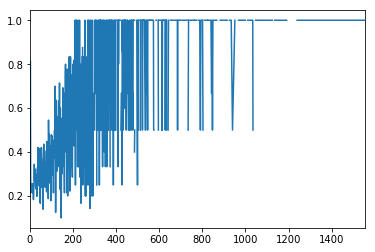

In [69]:
fraction_with_non_nans = (big5_corr_df["n"][ big5_corr_df[big5].notnull().any(axis=1) ].value_counts()/big5_corr_df["n"].value_counts())
display(fraction_with_non_nans.head(10))
fraction_with_non_nans.plot()

In [54]:
big5_corr_df["n"][ big5_corr_df[big5].applymap(lambda x:x in [-1,1]).any(axis=1) ].value_counts()

2.0    3770
3.0     801
4.0      53
5.0       4
Name: n, dtype: int64

In [ ]:
# We can decide how to filter by n later

In [23]:
# big5_corr_df["n"].value_counts()

In [55]:
big5_corr_df.mean()

n                           29.229202
openness                    -0.048690
agreeableness                0.096032
emotional_stability          0.078393
conscientiousness           -0.024879
extraversion                 0.104176
openness_mean                5.295015
openness_std                 0.964743
agreeableness_mean           4.246878
agreeableness_std            1.188624
emotional_stability_mean     4.438112
emotional_stability_std      1.259993
conscientiousness_mean       4.720282
conscientiousness_std        1.194048
extraversion_mean            3.279245
extraversion_std             1.364410
rating_mean                  3.049702
rating_std                   0.815893
dtype: float64

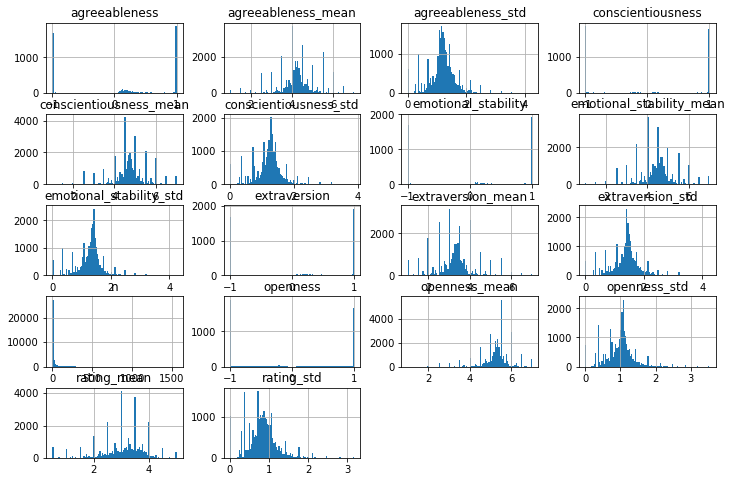

In [56]:
big5_corr_df.hist(bins=100, figsize = (12,8));

In [26]:
big5_corr_df[big5].corr()
# feels like two clusters

# openness-extraversion
# agreeableness-conscientiousness-emotional_stability

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
openness,1.000000,0.124747,0.017298,0.027710,0.300420
agreeableness,0.124747,1.000000,0.187456,0.146202,0.127230
emotional_stability,0.017298,0.187456,1.000000,0.316140,0.056152
conscientiousness,0.027710,0.146202,0.316140,1.000000,0.058479
extraversion,0.300420,0.127230,0.056152,0.058479,1.000000


In [76]:
@interact
def show_articles_more_than(column=big5, x=(-1,1,.1), n=10, lt=True, return_top=20):
    if lt:
        indices = big5_corr_df[ (big5_corr_df[column]<=-x) & (big5_corr_df["n"]>=n) ].index
        return ML_movies.set_index('movieId').loc[intersection(indices,np.unique(ML_movies["movieId"]))].head(return_top)
    else:
        indices = big5_corr_df[ (big5_corr_df[column]>=x) & (big5_corr_df["n"]>=n) ].index
        return ML_movies.set_index('movieId').loc[intersection(indices,np.unique(ML_movies["movieId"]))].head(return_top)

interactive(children=(Dropdown(description='column', options=('openness', 'agreeableness', 'emotional_stabilit…

In [35]:
# conscientioussness neg corr with high rating for ...
    # It's a Very Merry Muppet Christmas Movie (2002)
    # Itty Bitty Titty Committee (2007)

In [36]:
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["conscientiousness"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# high conscientiousness => high rating Jerry Springer: Ringmaster (1998)?

In [37]:
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["emotional_stability"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# don't recognise any, but do note that they are nearly all drama!

In [38]:
# movies whose rating is v negatively corr with extraversion
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["emotional_stability"]<=-.75) & (big5_corr_df["n"]>=10) ].index]

# low emotional stability => high rating for Anna Karenina (and vice versa)

In [39]:
# movies whose rating is v pos corr with extraversion
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["extraversion"]>=.75) & (big5_corr_df["n"]>=10) ].index]

In [ ]:
# Trailer Park boys seems to correlate neg with openness ... and pos with extraversion???

In [40]:
# movies whose rating is v neg corr with openness
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["openness"]<-.75) & (big5_corr_df["n"]>=10) ].index]
# Elvira, Mistress of the Dark (1988)	huh?

In [41]:
# movies whose rating is v pos corr with openness
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["openness"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# Ilsa, She Wolf of the SS (1974) -> Nazi sexpolioitation" ... I guess that's what I expected?
# Lone Wolf and Cub: Sword of Vengeance -> not actually made up for Bob's Burgers!
# Hannah Arendt (2012)	 again seems right PERS_ratingsfor high "openness"

In [711]:
PERS_personality_data['userid'].value_counts().head(7)

4638502dc978788ec9d44e64e43a6757    9
c56613815b9f708eb9df7eb6afd42a49    2
75a54727bffcbbb561da9d3eb604f28e    2
9ba0ccf0a69ae15c85d1b289baa4d494    2
5e82ce34f999ec0dbd2859b8b04dfcbf    2
3e0c0afd46ee7366f328ddf1dae83479    2
01e4e18e2e21b84ee1c5813fd5d3797f    2
Name: userid, dtype: int64

In [45]:
display( PERS_ratings["userid"].value_counts().head(10) )
display( PERS_ratings["userid"].value_counts().tail(10) ) 

1a4926479ca0b4c42df6cefb89aa59d9    9286
030001ac2145a938b07e686a35a2d638    8663
5251c36a5e4898da28a44a17b065a6b6    7940
b54372490fb6e3ccace51c0e3541db08    6743
8e7cebf9a234c064b75016249f2ac65e    6419
8a90d8a5aa3eb0be3da2c9b9cdae731c    5271
51486a050b36f396d461df563f9a8772    4610
041878034fe703d8f461afd053425b6b    4515
b9bfbe1d5cdb0990a6ab685ff5ecb6b7    4506
bbabaddade82aade657681b63523f969    4345
Name: userid, dtype: int64

9600462a6d913c56cb1b32a40a4bdbe3    16
96010e899a726c946163f2aa0cc4f0e4    16
b907feed50762a0a68d150a4a5a876fb    15
6dca8d2b55c96bb04fcbe16f259fffde    15
c8e7cc901691e1af1acca7bd18008748    15
26a31aa56d3ea83b8afb08dfec49b0b3    15
1a281dc93cf31e7df7c675af254d3a33    15
1526f4a779cc3723c955cddc3a353187    15
da7eec66296808c99884f1ea71b74d13    15
93877243a753b9448d522d016dac6a00     2
Name: userid, dtype: int64

In [ ]:
## PROBLEM (? TMDB data on budget is *really poor*)
# would really love to augment with some budget/revenue data

## Very intersting!
# https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg/downloads/350-000-movies-from-themoviedborg.zip/8
# https://github.com/stephanerappeneau/scienceofmovies

## Fill some gaps with this tmdb scrape
# https://www.kaggle.com/tmdb/tmdb-movie-metadata

## These people hit same problem with different dataset
# discussion: https://www.kaggle.com/c/tmdb-box-office-prediction/discussion/80431#latest-533211
# live kaggle (finishes 10 days!)
# https://www.kaggle.com/c/tmdb-box-office-prediction

## Another TMDB dataset
# https://www.kaggle.com/juzershakir/tmdb-movies-dataset


In [ ]:
## INITIAL ATTEMPTS TO NORMALISE IMDB_DATA

In [48]:
movie_metadata.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

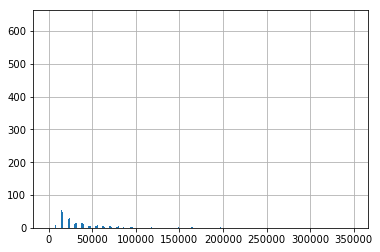

In [176]:
movie_metadata["movie_facebook_likes"].replace(0.0,np.nan).hist(bins=1000);

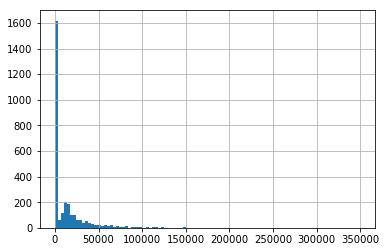

In [173]:
movie_metadata["movie_facebook_likes"].replace(0.0,np.nan).hist(bins=100);

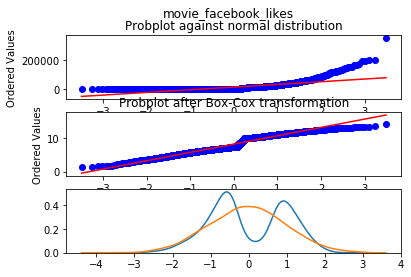

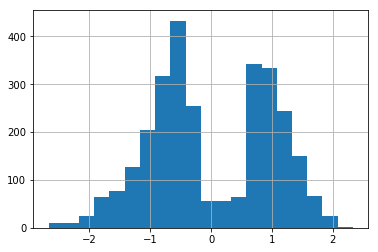

In [172]:
movie_metadata["movie_facebook_likes"].value_counts()

movie_facebook_likes = movie_metadata["movie_facebook_likes"].copy()

# lower bound (0.0) frequency too high to be part of a reasonable distribution
# maybe a sign of a screw up (e.g. scraping wrong name)
movie_facebook_likes = movie_facebook_likes.replace(0.0,np.nan)
movie_zerofblikes_or_unknown = movie_facebook_likes.isnull().astype('float')

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
movie_veryhigh_suspiciously_roundno_fblikes = (movie_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
movie_thousands_of_fblikes = movie_facebook_likes.copy()
movie_thousands_of_fblikes[movie_facebook_likes.isnull()] = 0
movie_thousands_of_fblikes[movie_facebook_likes<1000] = 0
movie_thousands_of_fblikes = movie_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# movie_facebook_likes[movie_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
movie_facebook_likes[movie_facebook_likes.notnull()] = box_cox_normalise( movie_facebook_likes.dropna(),
                   offset=0)
plt.figure()
movie_facebook_likes.hist(bins=20);
# eh ... good enough!


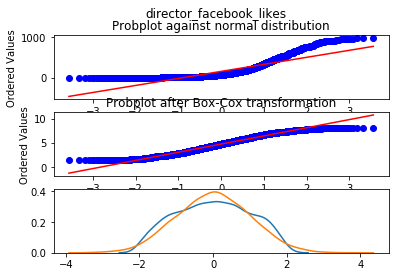

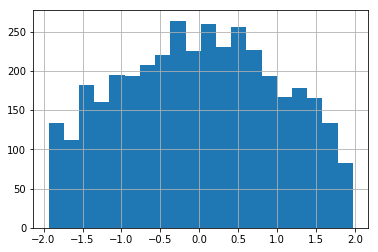

In [178]:
director_facebook_likes = movie_metadata["director_facebook_likes"].copy()

# lower bound (0.0) frequency too high to be part of a reasonable distribution
# maybe a sign of a screw up (e.g. scraping wrong name)
director_facebook_likes = director_facebook_likes.replace(0.0,np.nan)
director_zerofblikes_or_unknown = director_facebook_likes.isnull().astype('float')

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
director_veryhigh_suspiciously_roundno_fblikes = (director_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
director_thousands_of_fblikes = director_facebook_likes.copy()
director_thousands_of_fblikes[director_facebook_likes.isnull()] = 0
director_thousands_of_fblikes[director_facebook_likes<1000] = 0
director_thousands_of_fblikes = director_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
director_facebook_likes[director_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
director_facebook_likes[director_facebook_likes.notnull()] = box_cox_normalise( director_facebook_likes.dropna(),
                   offset=0)
plt.figure()
director_facebook_likes.hist(bins=20);
# eh ... good enough!


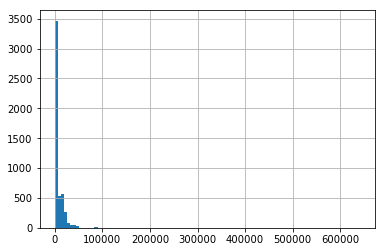

In [180]:
movie_metadata["actor_1_facebook_likes"].hist(bins=100)

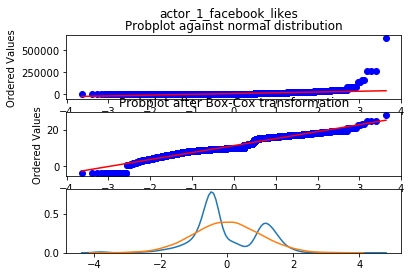

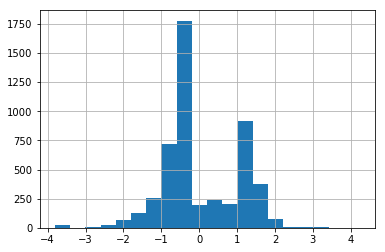

In [179]:
actor_1_facebook_likes = movie_metadata["actor_1_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_1_veryhigh_suspiciously_roundno_fblikes = (actor_1_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_1_thousands_of_fblikes = actor_1_facebook_likes.copy()
actor_1_thousands_of_fblikes[actor_1_facebook_likes.isnull()] = 0
actor_1_thousands_of_fblikes[actor_1_facebook_likes<1000] = 0
actor_1_thousands_of_fblikes = actor_1_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_1_facebook_likes[actor_1_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_1_facebook_likes[actor_1_facebook_likes.notnull()] = box_cox_normalise( actor_1_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_1_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

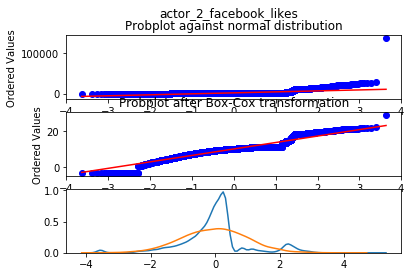

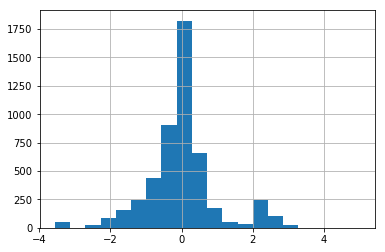

In [181]:
actor_2_facebook_likes = movie_metadata["actor_2_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_2_veryhigh_suspiciously_roundno_fblikes = (actor_2_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_2_thousands_of_fblikes = actor_2_facebook_likes.copy()
actor_2_thousands_of_fblikes[actor_2_facebook_likes.isnull()] = 0
actor_2_thousands_of_fblikes[actor_2_facebook_likes<1000] = 0
actor_2_thousands_of_fblikes = actor_2_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_2_facebook_likes[actor_2_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_2_facebook_likes[actor_2_facebook_likes.notnull()] = box_cox_normalise( actor_2_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_2_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

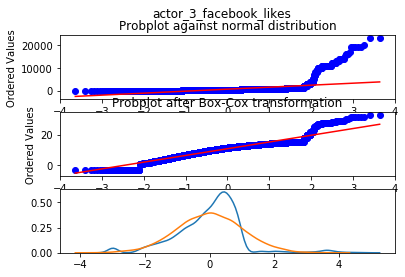

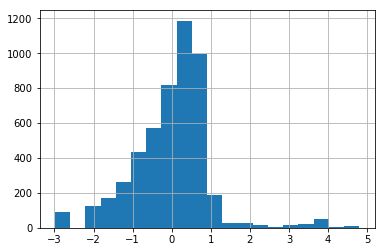

In [182]:
actor_3_facebook_likes = movie_metadata["actor_3_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_3_veryhigh_suspiciously_roundno_fblikes = (actor_3_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_3_thousands_of_fblikes = actor_3_facebook_likes.copy()
actor_3_thousands_of_fblikes[actor_3_facebook_likes.isnull()] = 0
actor_3_thousands_of_fblikes[actor_3_facebook_likes<1000] = 0
actor_3_thousands_of_fblikes = actor_3_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_3_facebook_likes[actor_3_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_3_facebook_likes[actor_3_facebook_likes.notnull()] = box_cox_normalise( actor_3_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_3_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

In [ ]:
# I'm not sure how much this is a reflection of generative processses
# weird granularity with suddenly not counting anything other than thousands?



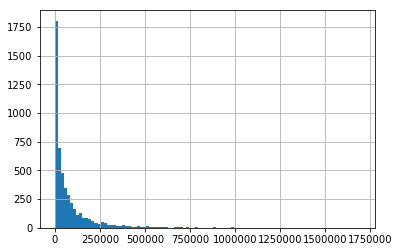

In [184]:
movie_metadata["num_voted_users"].hist(bins=100);

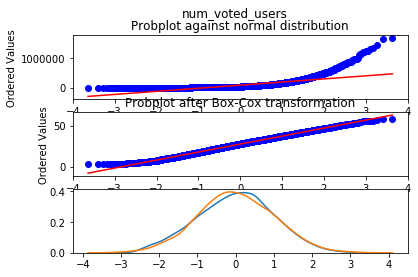

In [189]:
num_voted_users = movie_metadata["num_voted_users"].copy()
num_voted_users[num_voted_users.notnull()] = box_cox_normalise( movie_metadata["num_voted_users"].dropna(),
                   offset=0.01)

# perfect??

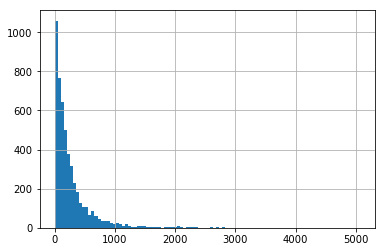

In [187]:
movie_metadata["num_user_for_reviews"].hist(bins=100);
# num_user_for_reviews

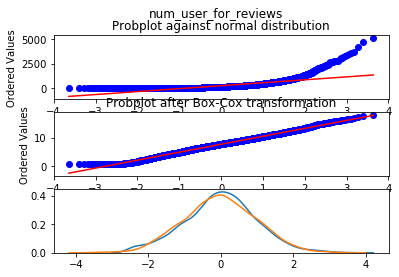

In [191]:
num_user_for_reviews = movie_metadata["num_user_for_reviews"].copy()
num_user_for_reviews[num_user_for_reviews.notnull()] = box_cox_normalise( num_user_for_reviews.dropna(),
                   offset=0.01)

# perfect??

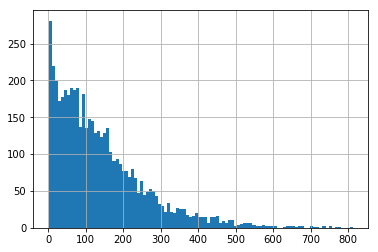

In [192]:
# num_critic_for_reviews
movie_metadata["num_critic_for_reviews"].hist(bins=100);
# num_user_for_reviews


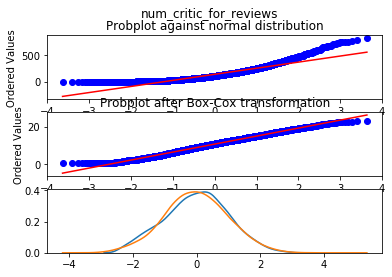

In [193]:
num_critic_for_reviews = movie_metadata["num_critic_for_reviews"].copy()
num_critic_for_reviews[num_critic_for_reviews.notnull()] = box_cox_normalise( num_critic_for_reviews.dropna(),
                   offset=0.01)

# perfect??

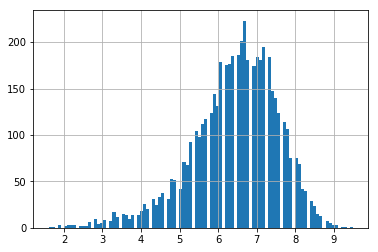

In [194]:
movie_metadata["imdb_score"].hist(bins=100);
# imdb_score

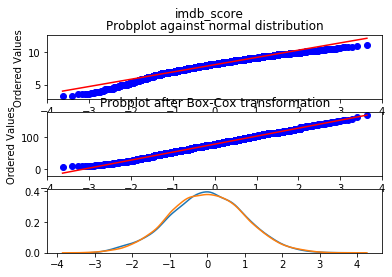

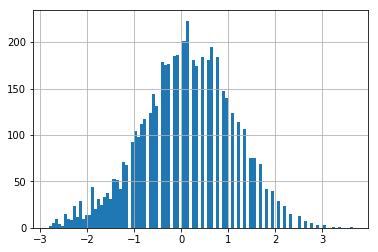

In [197]:
imdb_score = movie_metadata["imdb_score"].copy()
imdb_score[imdb_score.notnull()] = box_cox_normalise( imdb_score.dropna(),
                   offset=0.01)

plt.figure()
imdb_score.hist(bins=100);
# perfect??

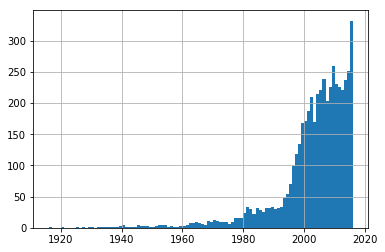

In [199]:
movie_metadata["title_year"].hist(bins=100);
# imdb_score
# title_year

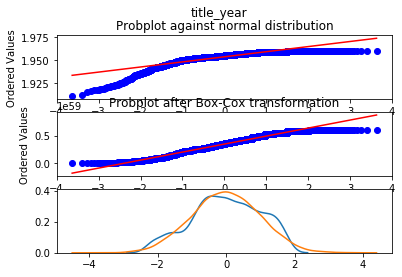

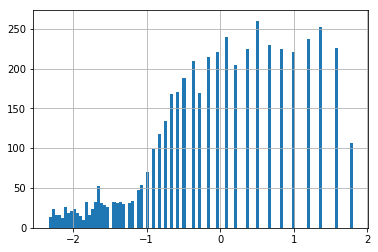

In [206]:
# title_year = box_cox_normalise( movie_metadata["title_year"].dropna()/movie_metadata["title_year"].max(),
#                    offset=0.0001)
# title_year.hist(bins=100)


title_year = movie_metadata["title_year"].copy()
title_year[title_year.notnull()] = box_cox_normalise( title_year.dropna()/title_year.max(),
                   offset=0.01)

plt.figure()
title_year.hist(bins=100);

# Nope
# linear years from first
# decade_dummies

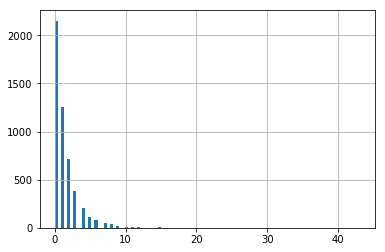

In [208]:
movie_metadata["facenumber_in_poster"].hist(bins=100);

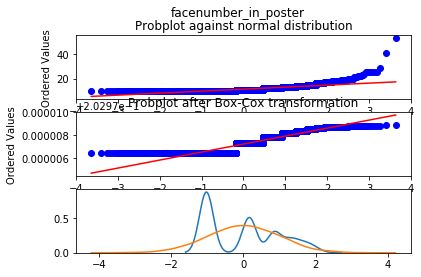

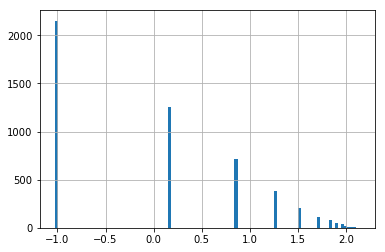

In [211]:
facenumber_in_poster = movie_metadata["facenumber_in_poster"].copy()
facenumber_in_poster[facenumber_in_poster.notnull()] = box_cox_normalise( facenumber_in_poster.dropna(),
                   offset=0.01)

plt.figure()
facenumber_in_poster.hist(bins=100);
# looks very power-law-y

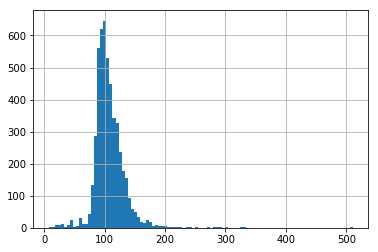

In [212]:
movie_metadata["duration"].hist(bins=100);

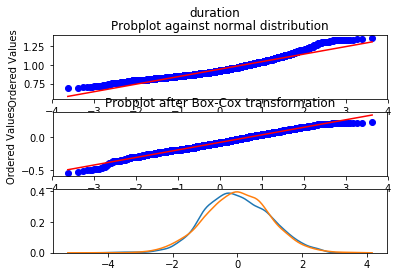

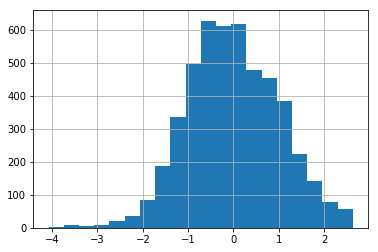

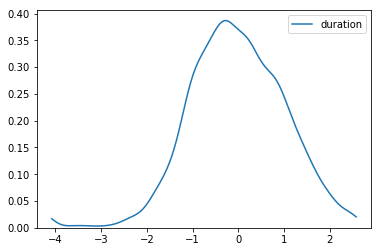

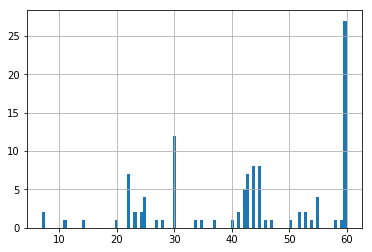

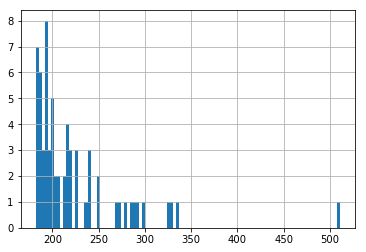

In [308]:
duration = movie_metadata["duration"].copy()

short_movie_less_than = 61
long_movie_greater_than = 181

unusually_short_movie = (duration<short_movie_less_than).astype('float')
unusually_short_movie_duration = duration[duration<short_movie_less_than]

unusually_long_movie = (duration>long_movie_greater_than).astype('float')
unusually_long_movie_duration = duration[duration>long_movie_greater_than]

duration[(duration>long_movie_greater_than) | (duration<short_movie_less_than)] = np.nan
duration[duration.notnull()] = box_cox_normalise( duration.dropna()/duration.dropna().max(),
                   offset=0.01)
plt.figure()
duration.hist(bins=20);
plt.figure()
sns.kdeplot(duration[mask].dropna(), cut=0);

plt.figure();
unusually_short_movie_duration.hist(bins=100);
plt.figure();
unusually_long_movie_duration.hist(bins=100);

In [313]:
movie_metadata["aspect_ratio"].value_counts().sort_index()

1.18        1
1.20        1
1.33       68
1.37      100
1.44        1
1.50        2
1.66       64
1.75        3
1.77        1
1.78      110
1.85     1906
1.89        1
2.00        5
2.20       15
2.24        1
2.35     2360
2.39       15
2.40        3
2.55        2
2.76        3
4.00        7
16.00      45
Name: aspect_ratio, dtype: int64

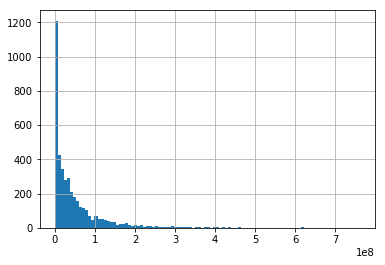

In [315]:
movie_metadata["gross"].hist(bins=100);

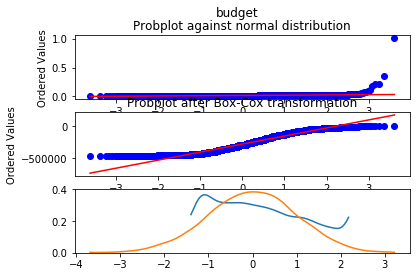

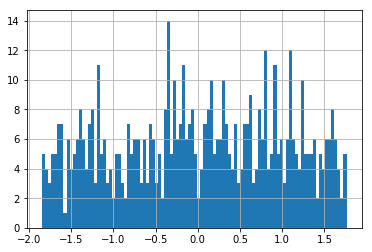

In [383]:
budget = movie_metadata["budget"].copy()

# mask = (movie_metadata["budget"]>10000.0)&(movie_metadata["budget"]<1.000000e+08)

# budget = budget[mask]

budget = box_cox_normalise( budget.dropna()/budget.max(),
                   offset=0.01)

plt.figure();
pd.Series(gross).hist(bins=100);

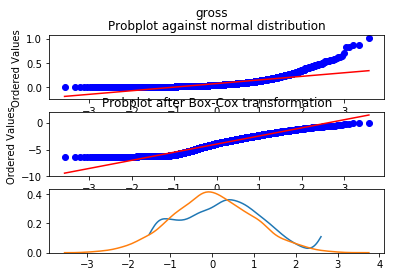

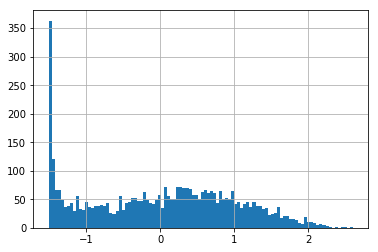

In [384]:
gross = movie_metadata["gross"].copy()

# gross = gross[gross<1000000]

gross = box_cox_normalise( gross.dropna()/gross.max(),
                   offset=0.01)

plt.figure();
pd.Series(gross).hist(bins=100);

In [371]:
profit = (movie_metadata["gross"]-movie_metadata["budget"]).copy()
profit.min()/profit.max()

-23.32982269059547

In [388]:
frac_profit = ((movie_metadata["gross"]-movie_metadata["budget"])/movie_metadata["budget"]).copy()

# gross = gross[gross<1000000]

# frac_profit = box_cox_normalise( frac_profit.dropna()/frac_profit.max(),
#                    offset=.01)

# plt.figure();
# pd.Series(frac_profit).hist(bins=100);

In [411]:
# frac_profit.value_counts().sort_index()

In [398]:
roi = movie_metadata["gross"]/movie_metadata["budget"]
roi[roi>7000]

4793    7194.485533
dtype: float64

In [399]:
movie_metadata.loc[4793]

color                                                                    Color
director_name                                                        Oren Peli
num_critic_for_reviews                                                     409
duration                                                                    84
director_facebook_likes                                                    110
actor_3_facebook_likes                                                      21
actor_2_name                                                     Ashley Palmer
actor_1_facebook_likes                                                     189
gross                                                              1.07917e+08
genres                                                                  Horror
actor_1_name                                                       Micah Sloat
movie_title                                               Paranormal Activity 
num_voted_users                                     

In [405]:
movie_metadata.loc[movie_metadata["budget"][(movie_metadata["gross"]/movie_metadata["budget"])>1000].index][["budget","gross","title_year","movie_title"]]

,budget,gross,title_year,movie_title
4707,60000.0,140530114.0,1999.0,The Blair Witch Project
4793,15000.0,107917283.0,2007.0,Paranormal Activity
4799,218.0,592014.0,2003.0,Tarnation


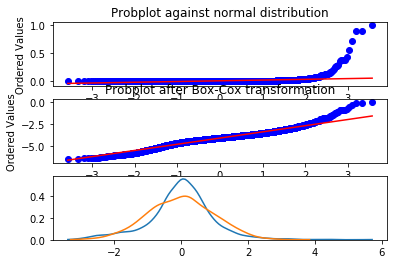

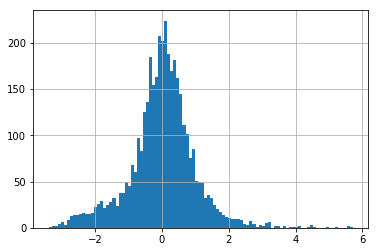

In [382]:
roi = (movie_metadata["gross"]/movie_metadata["budget"]).copy()

# gross = gross[gross<1000000]
roi = roi[roi<1000]

roi = box_cox_normalise( roi.dropna()/roi.max(),
                   offset=0)

plt.figure();
pd.Series(roi).hist(bins=100);

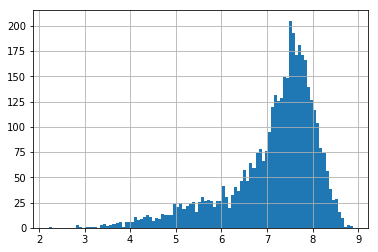

In [319]:
movie_metadata["gross"].apply(lambda x: np.log10(x)).hist(bins=100);

In [322]:
movie_metadata["gross"].dropna().sort_values()

3330          162.0
4607          703.0
4606          721.0
3840          728.0
3552          828.0
4915         1111.0
4758         1332.0
4465         1521.0
4843         1711.0
4720         2245.0
4333         2436.0
4845         2468.0
4399         2580.0
4316         2843.0
3321         2874.0
2589         2964.0
4241         3330.0
4434         3478.0
3242         3607.0
4505         3830.0
3959         4063.0
1527         4091.0
4334         4556.0
5037         4584.0
2061         4756.0
4938         4914.0
4318         4958.0
4130         5005.0
4840         5199.0
4604         5494.0
           ...     
1805    362645141.0
79      362645141.0
812     363024263.0
521     368049635.0
31      373377893.0
339     377019252.0
236     380262555.0
338     380838870.0
125     400736600.0
36      402076689.0
161     403706375.0
27      407197282.0
439     407999255.0
32      408992272.0
43      414984497.0
509     422783777.0
13      423032628.0
186     424645577.0
3080    434949459.0


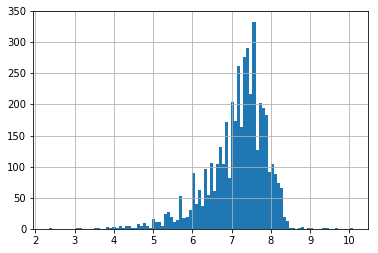

In [335]:
movie_metadata["budget"].apply(lambda x: np.log10(x)).hist(bins=100);

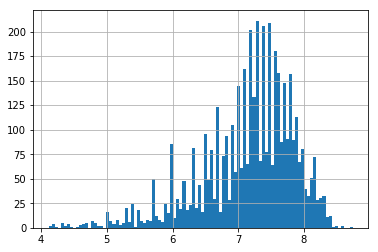

In [350]:
movie_metadata["budget"][mask].apply(lambda x: np.log10(x)).hist(bins=100);

In [342]:
movie_metadata["budget"].dropna().sort_values().tail(10)

3273    6.000000e+08
3851    7.000000e+08
3075    7.000000e+08
4542    1.000000e+09
3423    1.100000e+09
2334    2.127520e+09
2323    2.400000e+09
3005    2.500000e+09
3859    4.200000e+09
2988    1.221550e+10
Name: budget, dtype: float64

In [348]:
mask = (movie_metadata["budget"]>10000.0)&(movie_metadata["budget"]<6.000000e+08)

In [343]:
movie_metadata["budget"].dropna().sort_values().head(10)

4799      218.0
5042     1100.0
5040     1400.0
5036     3250.0
5026     4500.0
5035     7000.0
5034     7000.0
5033     7000.0
5037     9000.0
5028    10000.0
Name: budget, dtype: float64